In [24]:
import torch
from torch import nn
import torch.utils.data as Data
import torch.optim as optim
import numpy as np
from os.path import join as PJ
import matplotlib.pyplot as plt

In [25]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image,ImageOps

In [26]:
import tensorflow as tf

In [28]:
def LoadFiles(mode="train"):
    if mode == "train":
        with open(TrainFile, 'r') as trainf:
            image_info = trainf.readlines()
            image_info = [path.strip().split() for path in image_info]
            image_info = np.asarray(image_info)

            # Split to image path and label
            image_paths = image_info[:, 0]
            label_ids = image_info[:, 1].astype(int)

#             labels = tf.one_hot(label_ids, num_class, dtype=tf.int32)
            print("in Load : ", label_ids.shape)
            return image_paths, label_ids
    else:
        with open(TestFile, 'r') as testf:
            image_info = testf.readlines()
            image_info = [path.strip().split() for path in image_info]
            image_info = np.asarray(image_info)

            # Split to image path and label
            image_paths = image_info[:, 0]
            label_ids = image_info[:, 1].astype(int)
#             labels = tf.one_hot(label_ids, num_class, dtype=tf.int32)
            return image_paths, label_ids

In [29]:
import cv2
class TermiteDataset(Dataset):
    def __init__(self, data_file, transform):
        with open(data_file, 'r') as f:
            image_info = f.readlines()
        image_info = [path.strip().split() for path in image_info]
        image_info = np.asarray(image_info)

        # Split to image path and label
        self.image_paths = image_info[:, 0]
        self.label_ids = image_info[:, 1].astype(int)
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
#         print(idx, self.label_ids.shape, self.label_ids[idx])
        label = self.label_ids[idx]
        image_path = self.image_paths[idx]
        original_image = Image.open(image_path).convert('RGB')
        
#         print(original_image.size)
        
        if original_image.size[0] > 1000:
            original_image = original_image.resize((1000, original_image.size[1]*1000//original_image.size[0]))
        elif original_image.size[1] > 1000:
            original_image = original_image.resize((original_image.size[0]*1000//original_image.size[1], 1000))
#         print(original_image.shape)
        left = 500-original_image.size[0]//2
        right = 500-original_image.size[0]//2
        top = 500-original_image.size[1]//2
        bottom = 500-original_image.size[1]//2
        
        if left + right + original_image.size[0] != 1000:
            right = 1000 - left - original_image.size[0]
        if top + bottom + original_image.size[1] != 1000:
            top = 1000 - bottom - original_image.size[1]
        
#         original_image= cv2.copyMakeBorder(original_image,left,right,top,bottom,cv2.BORDER_CONSTANT,value=(0, 0, 0))
        original_image = ImageOps.expand(original_image, border=(left,top,right,bottom), fill=0)##left,top,right,bottom
        original_image = original_image.resize((130,130))
        transform1 = transforms.Compose([transforms.ToTensor()])
        original_image = transform1(original_image)
#         print(original_image.shape)
        
        
#         original_image = self.transform(original_image)
#         original_image.permute(2,0,1)
#         print(original_image.shape, answer.shape)
        return label, original_image, self.image_paths[idx]

def transform_set(train, new_size=None, pad=None):
    """
    train: True or False
    new_size: int or tuple
    
    """
#     transform_list = [transforms.ToTensor(),
#                       transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])]
    transform_list = [transforms.ToTensor()]
    # replace centercrop to padding
#     transform_list = [transforms.CenterCrop((crop_h, crop_w))] + transform_list if crop else transform_list
#     transform_list = [transforms.Resize(new_size)] + transform_list if new_size is not None else transform_list

#     transform_list = [transforms.RandomHorizontalFlip()] + transform_list if train else transform_list
    transform = transforms.Compose(transform_list)
    return transform

In [30]:
def CheckFile(filename):
    with open(filename, 'r') as f:
            image_info = f.readlines()
    image_info = [path.strip().split() for path in image_info]
    image_info = np.asarray(image_info)
    counts = {"台灣土白蟻兵蟻" : 0,
             "台灣土白蟻工蟻" : 0,
             "台灣家白蟻兵蟻" : 0,
             "台灣家白蟻工蟻" : 0,
             "截頭堆沙兵蟻" : 0,
             "截頭堆沙工蟻" : 0,
             "黃肢散工蟻" : 0,
             "黃肢散兵蟻" : 0,
             "背景": 0}
        
    Locations = {"L1" : 0,
             "L2" : 0,
             "L3" : 0}
    for line in image_info:
        path = line[0]
        if "L1" in path:
            Locations["L1"] += 1
        if "L2" in path:
            Locations["L2"] += 1
        if "L3" in path:
            Locations["L3"] += 1
        if "台灣土白蟻兵蟻" in path:
            counts["台灣土白蟻兵蟻"] += 1
        if "台灣土白蟻工蟻" in path:
            counts["台灣土白蟻工蟻"] += 1
        if "台灣家白蟻兵蟻" in path:
            counts["台灣家白蟻兵蟻"] += 1
        if "台灣家白蟻工蟻" in path:
            counts["台灣家白蟻工蟻"] += 1
        if "截頭堆沙兵蟻" in path:
            counts["截頭堆沙兵蟻"] += 1
        if "截頭堆沙工蟻" in path:
            counts["截頭堆沙工蟻"] += 1
        if "黃肢散兵蟻" in path:
            counts["黃肢散兵蟻"] += 1
        if "黃肢散工蟻" in path:
            counts["黃肢散工蟻"] += 1
        if "背景" in path:
            counts["背景"] += 1
    print(Locations, counts)

In [31]:
BATCH_SIZE = 64
EPOCH = 100
LearningRate = 0.0001
Momentum = 0.9
TrainFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_trainfile_2_200aug.txt"
ValFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_valfile_2_200aug.txt"
TestFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_testfile_2.txt"
# classes = ["O. formosanus Army","O. formosanus Worker", "C. formosanus Army","C. formosanus Worker", "C. domesticus Army","C. domesticus Worker", "R. flaviceps Worker", "R. flaviceps Army"]
classes = ["O.f Soldier","O.f Worker", "C.f Soldier","C.f Worker", "C.d Soldier","C.d Worker", "R.f Soldier", "R.f Worker"]
model_directory = "/home/ytliu/Termite-Bonnie/PAPER_termite/*BENCHMARK-LARGE_2_200aug/"
temp_directory = "/home/ytliu/Termite-Bonnie/PAPER_termite/*BENCHMARK-LARGE_2_200aug/"

In [32]:
print("TrainFile : ", TrainFile)
print("ValidationFile : ", ValFile)
print("TestFile : ", TestFile)
CheckFile(TrainFile)
CheckFile(ValFile)
CheckFile(TestFile)

TrainFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_trainfile_L13_CFselected_200aug.txt
ValidationFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_valfile_L13_CFselected_200aug.txt
TestFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_testfile_L13.txt
{'L1': 6400, 'L2': 0, 'L3': 6400} {'台灣土白蟻兵蟻': 1600, '台灣土白蟻工蟻': 1600, '台灣家白蟻兵蟻': 1600, '台灣家白蟻工蟻': 1600, '截頭堆沙兵蟻': 1600, '截頭堆沙工蟻': 1600, '黃肢散工蟻': 1600, '黃肢散兵蟻': 1600, '背景': 0}
{'L1': 1600, 'L2': 0, 'L3': 1600} {'台灣土白蟻兵蟻': 400, '台灣土白蟻工蟻': 400, '台灣家白蟻兵蟻': 400, '台灣家白蟻工蟻': 400, '截頭堆沙兵蟻': 400, '截頭堆沙工蟻': 400, '黃肢散工蟻': 400, '黃肢散兵蟻': 400, '背景': 0}
{'L1': 0, 'L2': 8000, 'L3': 0} {'台灣土白蟻兵蟻': 1000, '台灣土白蟻工蟻': 1000, '台灣家白蟻兵蟻': 1000, '台灣家白蟻工蟻': 1000, '截頭堆沙兵蟻': 1000, '截頭堆沙工蟻': 1000, '黃肢散工蟻': 1000, '黃肢散兵蟻': 1000, '背景': 0}


In [33]:
import torchvision.models as models
import os
# from MobileNetV2 import MobileNetV2
print(torch.__version__)
# torch.cuda.set_device(1)
print(torch.cuda.current_device())
# mobilenet =  MobileNetV2(n_class=len(classes)).cuda()
mobilenet =  nn.Sequential(models.mobilenet_v2(pretrained=True), nn.Linear(1000, len(classes))).cuda()

1.3.0
0


In [34]:
model = mobilenet
# model = MobileNet(len(classes))
# model.to(cuda)
# model = model.cuda()
model = model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LearningRate, momentum=Momentum)

In [35]:
transform = transform_set(train=True)
trainset = TermiteDataset(TrainFile, transform)
trainloader = Data.DataLoader(
    dataset=trainset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [36]:
transform2 = transform_set(train=False)
valset = TermiteDataset(ValFile, transform2)
valloader = Data.DataLoader(
    dataset=valset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [ ]:
# for labels, images in loader:
#     print(labels.shape)
#     print(images.shape)
#     ssssss

# TRAIN
### 
### validation

Train
[1, 00020] loss: 50.101 acc: 0.165
[1, 00040] loss: 84.464 acc: 0.266
[1, 00060] loss: 111.917 acc: 0.340
[1, 00080] loss: 136.601 acc: 0.390
[1, 00100] loss: 157.014 acc: 0.435
[1, 00120] loss: 175.131 acc: 0.476
[1, 00140] loss: 191.304 acc: 0.507
[1, 00160] loss: 206.537 acc: 0.535
[1, 00180] loss: 220.236 acc: 0.559
[1, 00200] loss: 233.616 acc: 0.580
[0.579765625]
[233.61620274186134]


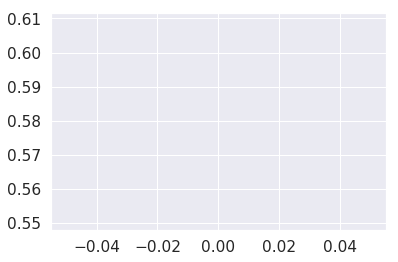

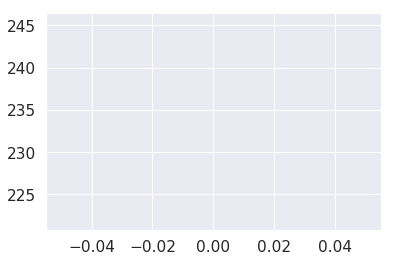

Validation
[0.7609375]
[33.089440047740936]


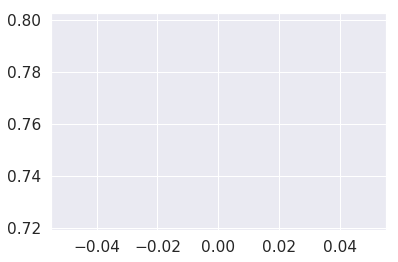

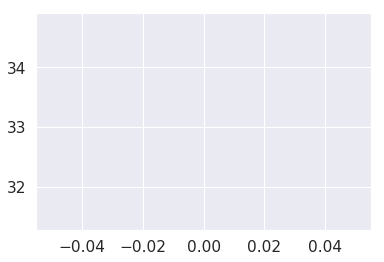


[1] accuracy: 0.761 loss: 33.089

runtime :  209.29209542274475
Train
[2, 00020] loss: 11.176 acc: 0.815
[2, 00040] loss: 21.525 acc: 0.815
[2, 00060] loss: 31.971 acc: 0.816
[2, 00080] loss: 41.877 acc: 0.820
[2, 00100] loss: 51.814 acc: 0.820
[2, 00120] loss: 62.017 acc: 0.821
[2, 00140] loss: 70.724 acc: 0.825
[2, 00160] loss: 79.526 acc: 0.826
[2, 00180] loss: 87.805 acc: 0.829
[2, 00200] loss: 96.382 acc: 0.830
[0.579765625, 0.83046875]
[233.61620274186134, 96.38189399242401]


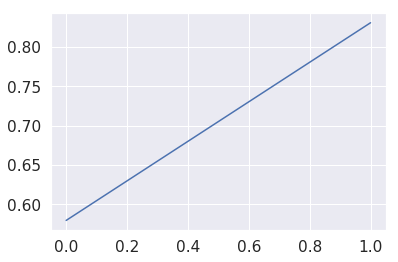

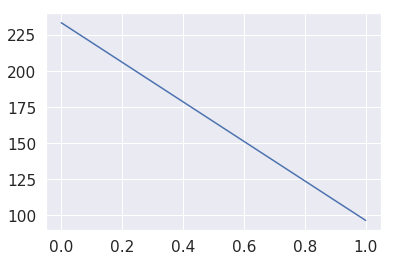

Validation
[0.7609375, 0.851875]
[33.089440047740936, 22.01114049553871]


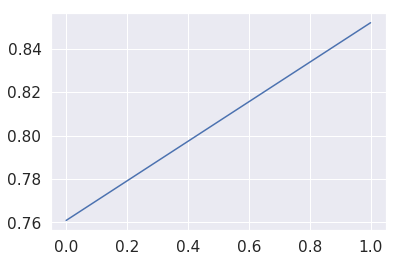

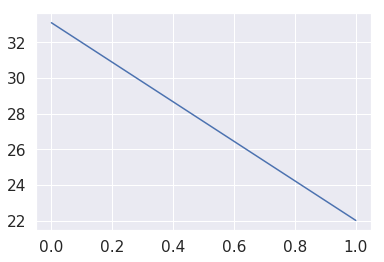


[2] accuracy: 0.852 loss: 22.011

runtime :  493.7295205593109
Train
[3, 00020] loss: 7.425 acc: 0.877
[3, 00040] loss: 14.304 acc: 0.887
[3, 00060] loss: 21.064 acc: 0.886
[3, 00080] loss: 27.624 acc: 0.887
[3, 00100] loss: 33.973 acc: 0.886
[3, 00120] loss: 40.222 acc: 0.887
[3, 00140] loss: 46.083 acc: 0.889
[3, 00160] loss: 51.982 acc: 0.890
[3, 00180] loss: 58.049 acc: 0.891
[3, 00200] loss: 63.685 acc: 0.893
[0.579765625, 0.83046875, 0.89328125]
[233.61620274186134, 96.38189399242401, 63.68513681739569]


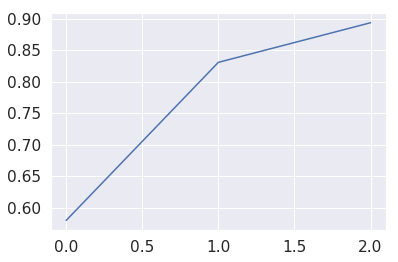

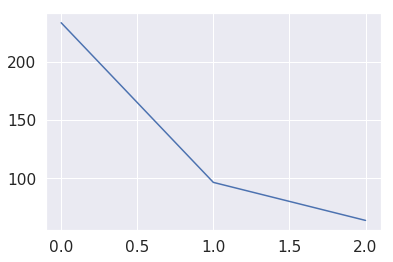

Validation
[0.7609375, 0.851875, 0.879375]
[33.089440047740936, 22.01114049553871, 16.846210956573486]


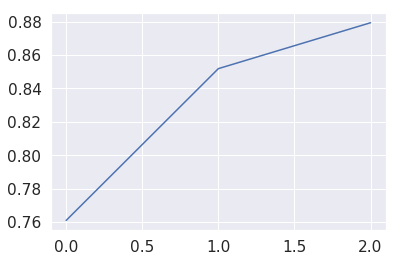

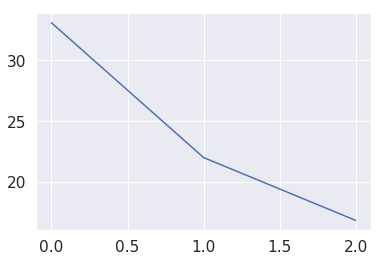


[3] accuracy: 0.879 loss: 16.846

runtime :  780.5991444587708
Train
[4, 00020] loss: 4.962 acc: 0.920
[4, 00040] loss: 9.526 acc: 0.922
[4, 00060] loss: 14.545 acc: 0.917
[4, 00080] loss: 19.488 acc: 0.916
[4, 00100] loss: 24.301 acc: 0.916
[4, 00120] loss: 29.264 acc: 0.916
[4, 00140] loss: 33.911 acc: 0.918
[4, 00160] loss: 38.558 acc: 0.918
[4, 00180] loss: 42.589 acc: 0.920
[4, 00200] loss: 46.784 acc: 0.921
[0.579765625, 0.83046875, 0.89328125, 0.921015625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296]


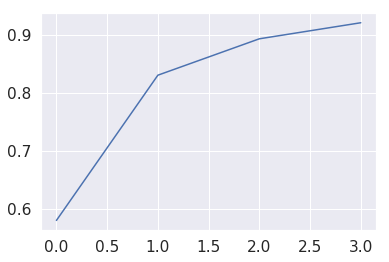

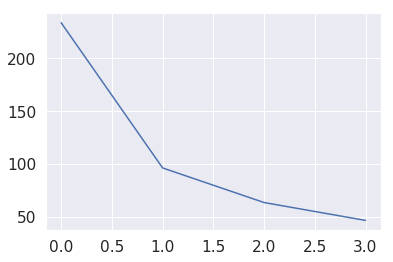

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433]


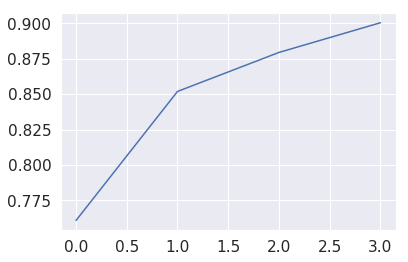

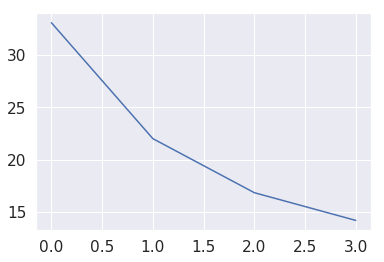


[4] accuracy: 0.900 loss: 14.197

runtime :  1065.7017722129822
Train
[5, 00020] loss: 3.668 acc: 0.944
[5, 00040] loss: 7.552 acc: 0.938
[5, 00060] loss: 10.930 acc: 0.940
[5, 00080] loss: 14.604 acc: 0.942
[5, 00100] loss: 17.720 acc: 0.944
[5, 00120] loss: 21.984 acc: 0.941
[5, 00140] loss: 25.374 acc: 0.941
[5, 00160] loss: 28.752 acc: 0.942
[5, 00180] loss: 32.668 acc: 0.941
[5, 00200] loss: 36.162 acc: 0.941
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712]


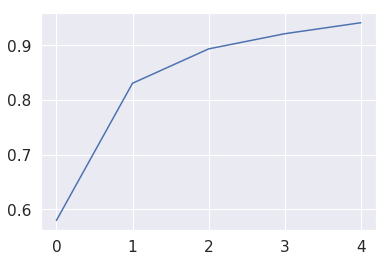

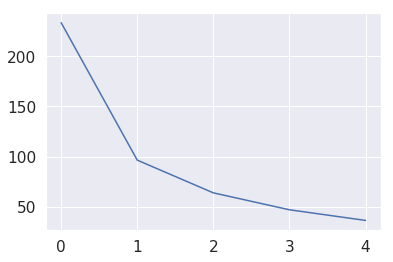

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853]


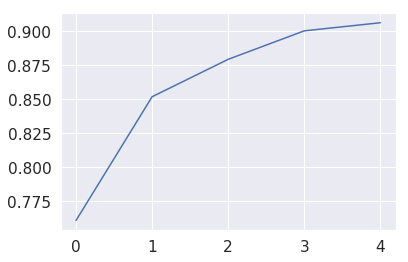

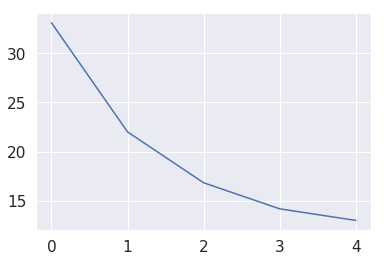


[5] accuracy: 0.906 loss: 13.021

runtime :  1446.1761481761932
Train
[6, 00020] loss: 2.812 acc: 0.959
[6, 00040] loss: 5.704 acc: 0.957
[6, 00060] loss: 8.213 acc: 0.961
[6, 00080] loss: 11.347 acc: 0.958
[6, 00100] loss: 14.099 acc: 0.956
[6, 00120] loss: 17.022 acc: 0.956
[6, 00140] loss: 19.846 acc: 0.955
[6, 00160] loss: 22.444 acc: 0.956
[6, 00180] loss: 25.237 acc: 0.955
[6, 00200] loss: 28.687 acc: 0.954
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313]


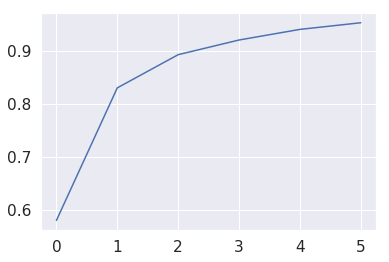

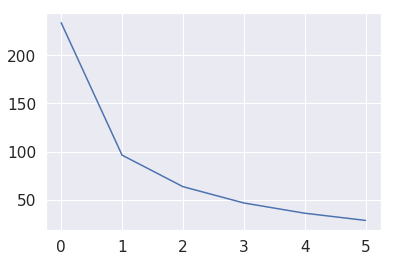

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957]


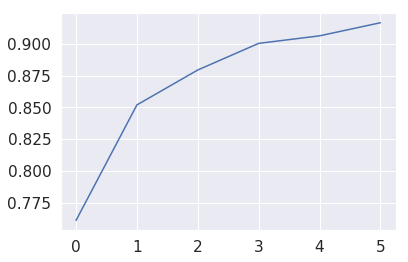

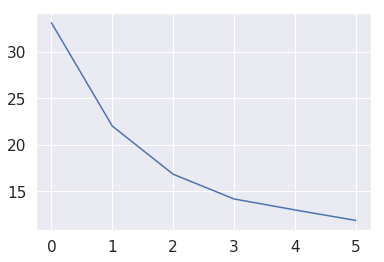


[6] accuracy: 0.917 loss: 11.895

runtime :  1967.5816266536713
Train
[7, 00020] loss: 2.183 acc: 0.962
[7, 00040] loss: 4.471 acc: 0.963
[7, 00060] loss: 6.901 acc: 0.963
[7, 00080] loss: 9.044 acc: 0.962
[7, 00100] loss: 10.829 acc: 0.965
[7, 00120] loss: 13.265 acc: 0.964
[7, 00140] loss: 15.859 acc: 0.964
[7, 00160] loss: 18.281 acc: 0.964
[7, 00180] loss: 20.758 acc: 0.963
[7, 00200] loss: 22.977 acc: 0.963
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587]


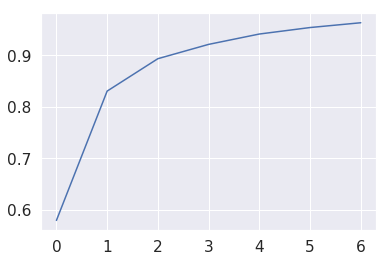

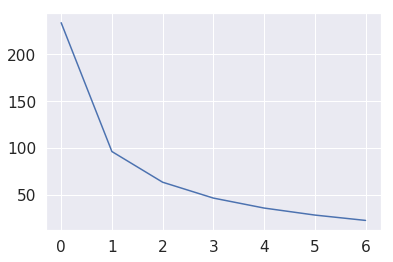

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927]


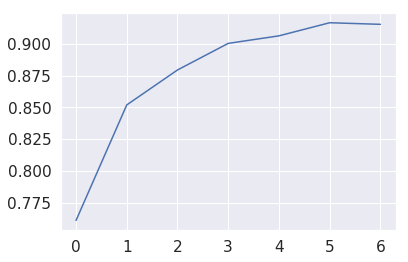

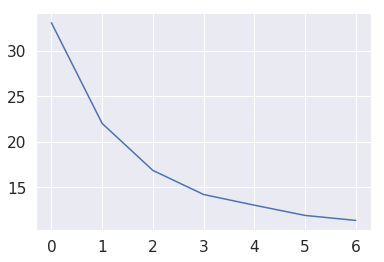


[7] accuracy: 0.915 loss: 11.345

runtime :  2488.110423564911
Train
[8, 00020] loss: 2.059 acc: 0.967
[8, 00040] loss: 4.399 acc: 0.963
[8, 00060] loss: 6.081 acc: 0.967
[8, 00080] loss: 8.134 acc: 0.968
[8, 00100] loss: 9.967 acc: 0.969
[8, 00120] loss: 11.893 acc: 0.969
[8, 00140] loss: 13.691 acc: 0.969
[8, 00160] loss: 15.466 acc: 0.970
[8, 00180] loss: 17.457 acc: 0.969
[8, 00200] loss: 19.318 acc: 0.969
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658]


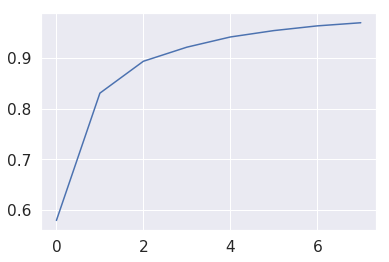

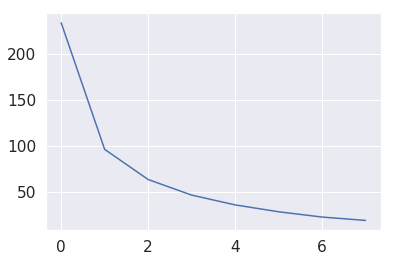

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647]


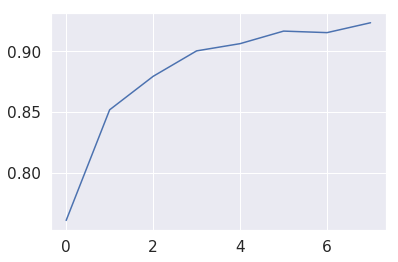

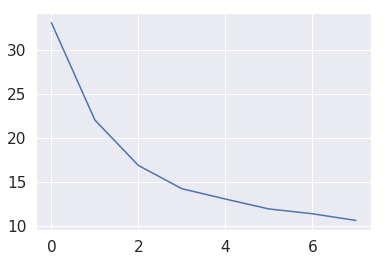


[8] accuracy: 0.923 loss: 10.587

runtime :  3008.923443555832
Train
[9, 00020] loss: 1.627 acc: 0.976
[9, 00040] loss: 3.510 acc: 0.974
[9, 00060] loss: 5.473 acc: 0.972
[9, 00080] loss: 7.307 acc: 0.972
[9, 00100] loss: 8.994 acc: 0.973
[9, 00120] loss: 10.605 acc: 0.974
[9, 00140] loss: 11.878 acc: 0.975
[9, 00160] loss: 13.384 acc: 0.975
[9, 00180] loss: 14.868 acc: 0.975
[9, 00200] loss: 16.781 acc: 0.975
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446]


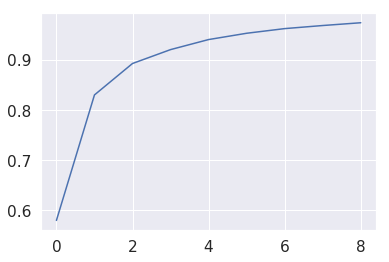

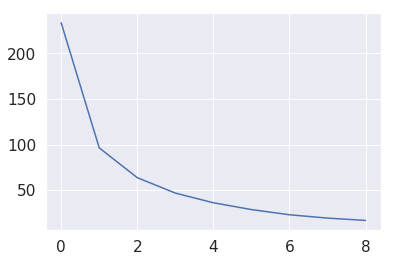

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007]


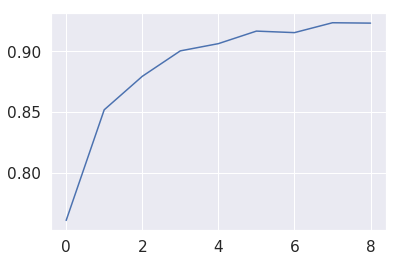

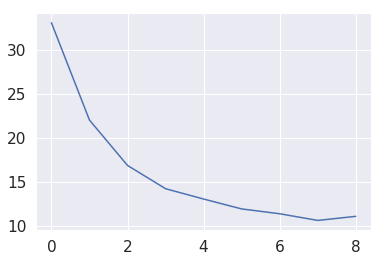


[9] accuracy: 0.923 loss: 11.051

runtime :  3527.259405851364
Train
[10, 00020] loss: 1.389 acc: 0.979
[10, 00040] loss: 2.507 acc: 0.982
[10, 00060] loss: 3.876 acc: 0.981
[10, 00080] loss: 5.522 acc: 0.978
[10, 00100] loss: 6.980 acc: 0.978
[10, 00120] loss: 8.385 acc: 0.978
[10, 00140] loss: 9.876 acc: 0.978
[10, 00160] loss: 11.242 acc: 0.978
[10, 00180] loss: 12.512 acc: 0.978
[10, 00200] loss: 14.034 acc: 0.977
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123]


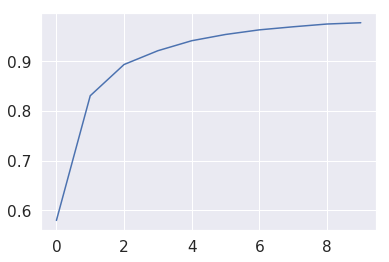

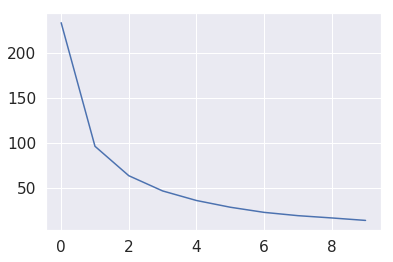

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063]


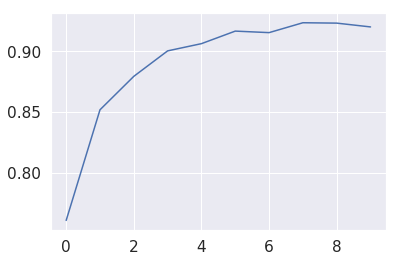

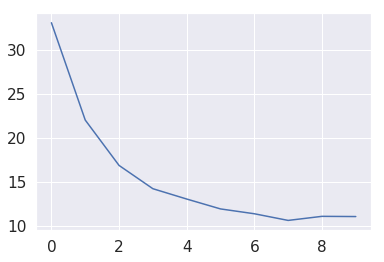


[10] accuracy: 0.920 loss: 11.027

runtime :  4043.9492161273956
Train
[11, 00020] loss: 1.185 acc: 0.982
[11, 00040] loss: 2.505 acc: 0.982
[11, 00060] loss: 3.391 acc: 0.985
[11, 00080] loss: 4.413 acc: 0.986
[11, 00100] loss: 5.468 acc: 0.985
[11, 00120] loss: 6.695 acc: 0.985
[11, 00140] loss: 7.779 acc: 0.985
[11, 00160] loss: 8.945 acc: 0.984
[11, 00180] loss: 9.997 acc: 0.984
[11, 00200] loss: 11.190 acc: 0.984
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264]


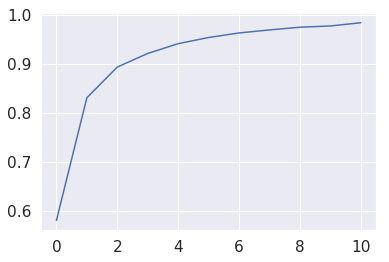

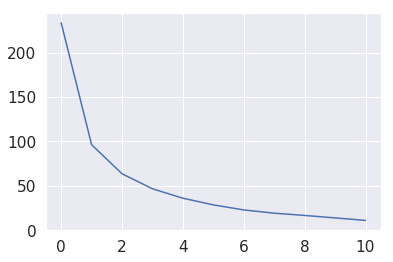

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736]


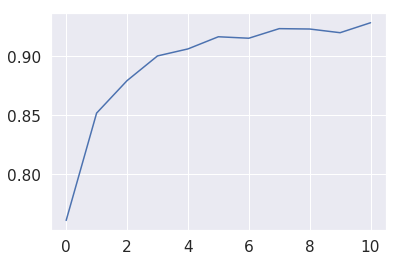

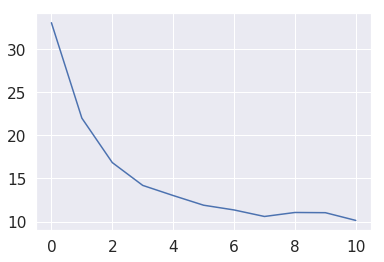


[11] accuracy: 0.928 loss: 10.129

runtime :  4561.0009133815765
Train
[12, 00020] loss: 0.801 acc: 0.989
[12, 00040] loss: 1.768 acc: 0.989
[12, 00060] loss: 2.715 acc: 0.986
[12, 00080] loss: 3.606 acc: 0.987
[12, 00100] loss: 4.826 acc: 0.985
[12, 00120] loss: 5.527 acc: 0.987
[12, 00140] loss: 6.399 acc: 0.987
[12, 00160] loss: 7.372 acc: 0.987
[12, 00180] loss: 8.340 acc: 0.987
[12, 00200] loss: 9.287 acc: 0.987
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798]


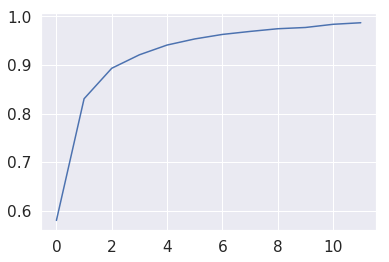

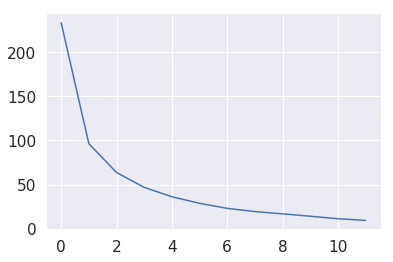

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048]


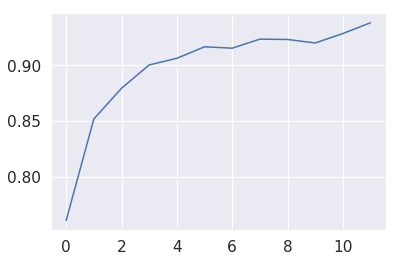

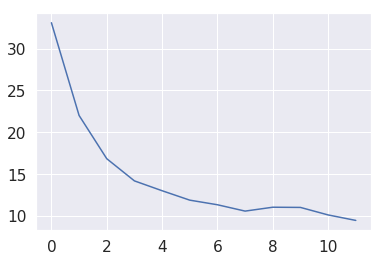


[12] accuracy: 0.938 loss: 9.474

runtime :  5085.675048112869
Train
[13, 00020] loss: 0.974 acc: 0.983
[13, 00040] loss: 1.696 acc: 0.985
[13, 00060] loss: 2.520 acc: 0.987
[13, 00080] loss: 3.296 acc: 0.988
[13, 00100] loss: 4.154 acc: 0.988
[13, 00120] loss: 5.068 acc: 0.988
[13, 00140] loss: 5.851 acc: 0.988
[13, 00160] loss: 6.606 acc: 0.988
[13, 00180] loss: 7.575 acc: 0.988
[13, 00200] loss: 8.350 acc: 0.988
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164]


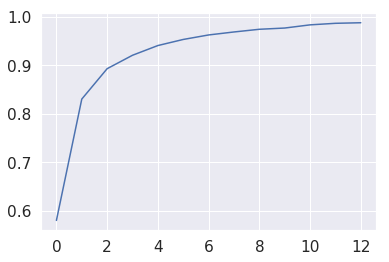

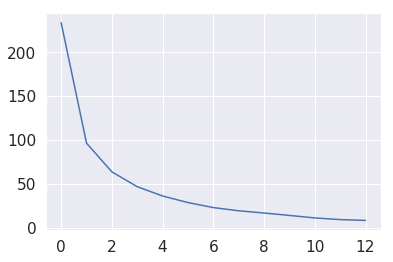

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074]


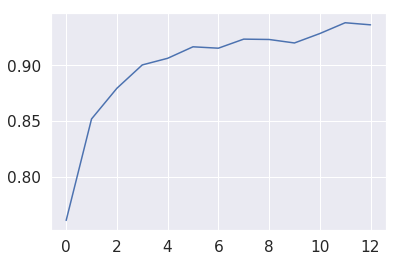

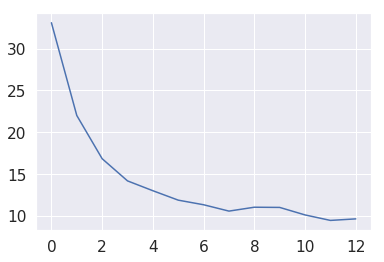


[13] accuracy: 0.936 loss: 9.657

runtime :  5608.288115501404
Train
[14, 00020] loss: 0.697 acc: 0.988
[14, 00040] loss: 1.422 acc: 0.989
[14, 00060] loss: 2.090 acc: 0.990
[14, 00080] loss: 2.709 acc: 0.991
[14, 00100] loss: 3.390 acc: 0.991
[14, 00120] loss: 4.376 acc: 0.990
[14, 00140] loss: 5.118 acc: 0.990
[14, 00160] loss: 5.952 acc: 0.989
[14, 00180] loss: 6.809 acc: 0.989
[14, 00200] loss: 7.672 acc: 0.989
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951]


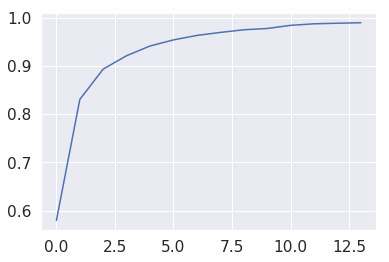

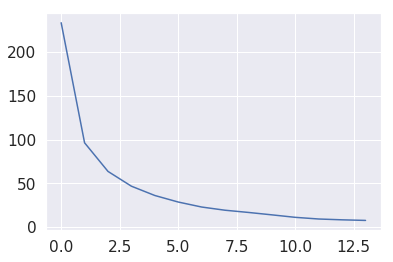

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382]


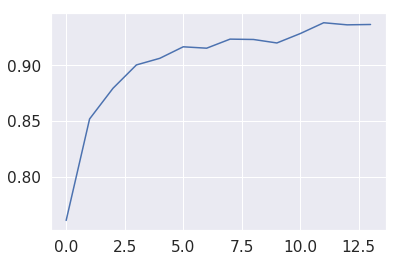

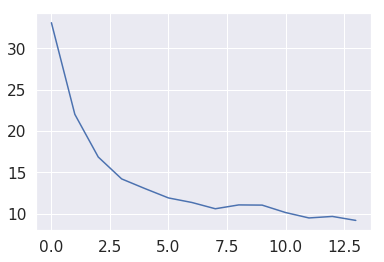


[14] accuracy: 0.937 loss: 9.175

runtime :  6131.704682826996
Train
[15, 00020] loss: 0.724 acc: 0.991
[15, 00040] loss: 1.452 acc: 0.989
[15, 00060] loss: 2.079 acc: 0.990
[15, 00080] loss: 2.803 acc: 0.990
[15, 00100] loss: 3.340 acc: 0.991
[15, 00120] loss: 3.944 acc: 0.991
[15, 00140] loss: 4.539 acc: 0.991
[15, 00160] loss: 5.092 acc: 0.991
[15, 00180] loss: 5.918 acc: 0.991
[15, 00200] loss: 6.484 acc: 0.992
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951, 6.483665633946657]


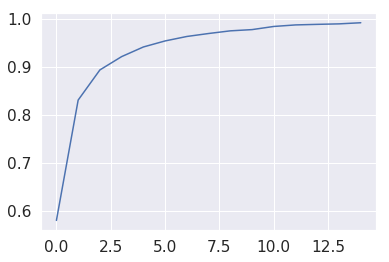

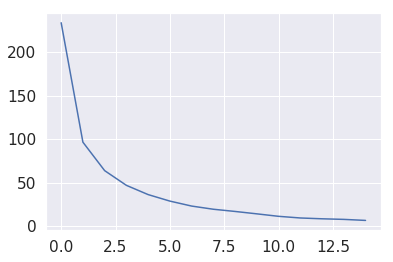

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229]


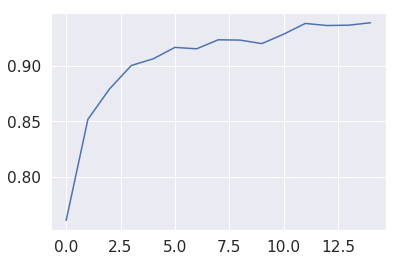

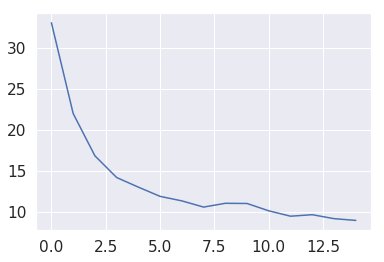


[15] accuracy: 0.939 loss: 8.960

runtime :  6654.852345943451
Train
[16, 00020] loss: 0.455 acc: 0.995
[16, 00040] loss: 0.954 acc: 0.995
[16, 00060] loss: 1.449 acc: 0.995
[16, 00080] loss: 1.998 acc: 0.994
[16, 00100] loss: 2.506 acc: 0.994
[16, 00120] loss: 3.046 acc: 0.994
[16, 00140] loss: 3.593 acc: 0.994
[16, 00160] loss: 4.119 acc: 0.994
[16, 00180] loss: 4.749 acc: 0.994
[16, 00200] loss: 5.226 acc: 0.994
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951, 6.483665633946657, 5.225828543305397]


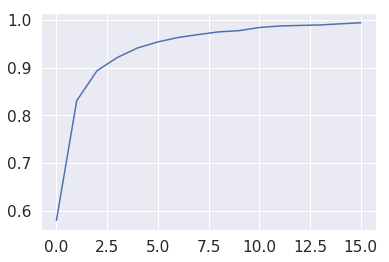

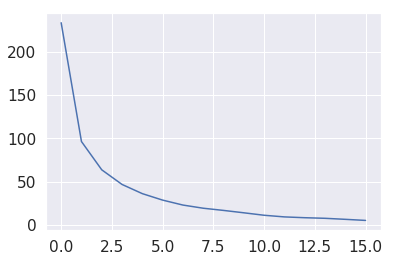

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212]


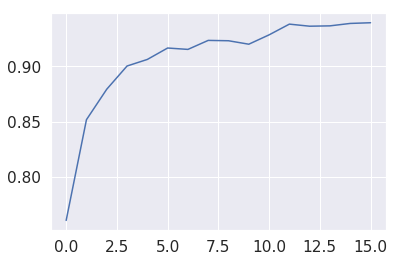

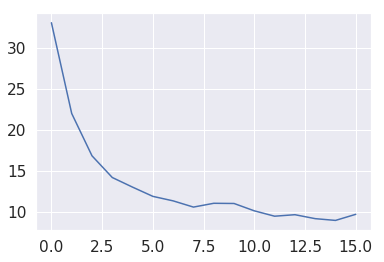


[16] accuracy: 0.939 loss: 9.706

runtime :  7176.670762062073
Train
[17, 00020] loss: 0.389 acc: 0.996
[17, 00040] loss: 1.021 acc: 0.995
[17, 00060] loss: 1.576 acc: 0.994
[17, 00080] loss: 2.012 acc: 0.994
[17, 00100] loss: 2.359 acc: 0.995
[17, 00120] loss: 2.794 acc: 0.995
[17, 00140] loss: 3.325 acc: 0.995
[17, 00160] loss: 3.753 acc: 0.995
[17, 00180] loss: 4.281 acc: 0.994
[17, 00200] loss: 4.744 acc: 0.995
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951, 6.483665633946657, 5.225828543305397, 4.743604276329279]


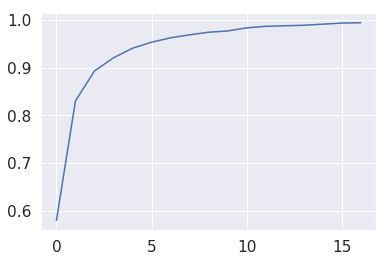

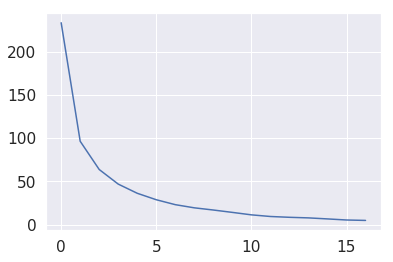

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923]


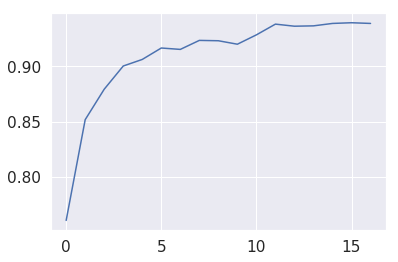

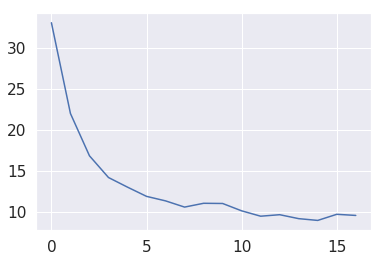


[17] accuracy: 0.939 loss: 9.568

runtime :  7701.112384557724
Train
[18, 00020] loss: 0.423 acc: 0.996
[18, 00040] loss: 0.939 acc: 0.995
[18, 00060] loss: 1.351 acc: 0.995
[18, 00080] loss: 1.836 acc: 0.994
[18, 00100] loss: 2.250 acc: 0.995
[18, 00120] loss: 2.662 acc: 0.995
[18, 00140] loss: 3.275 acc: 0.994
[18, 00160] loss: 3.926 acc: 0.993
[18, 00180] loss: 4.410 acc: 0.993
[18, 00200] loss: 4.781 acc: 0.994
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951, 6.483665633946657, 5.225828543305397, 4.743604276329279, 4.781179517507553]


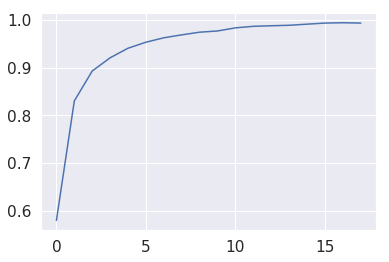

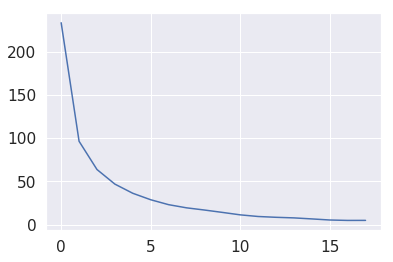

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787]


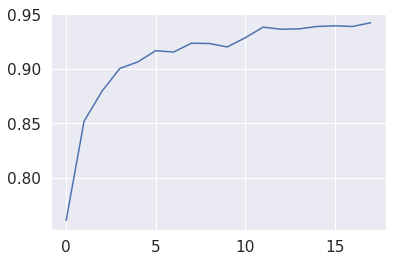

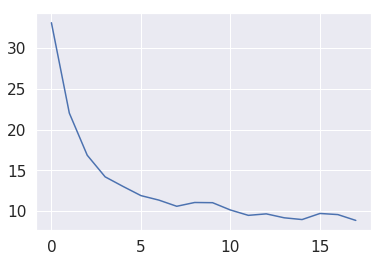


[18] accuracy: 0.942 loss: 8.854

runtime :  8224.844057321548
Train
[19, 00020] loss: 0.369 acc: 0.995
[19, 00040] loss: 0.815 acc: 0.995
[19, 00060] loss: 1.233 acc: 0.995
[19, 00080] loss: 1.609 acc: 0.995
[19, 00100] loss: 1.895 acc: 0.996
[19, 00120] loss: 2.315 acc: 0.996
[19, 00140] loss: 2.739 acc: 0.996
[19, 00160] loss: 3.123 acc: 0.996
[19, 00180] loss: 3.549 acc: 0.996
[19, 00200] loss: 3.819 acc: 0.996
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951, 6.483665633946657, 5.225828543305397, 4.743604276329279, 4.781179517507

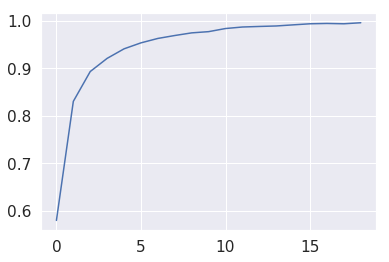

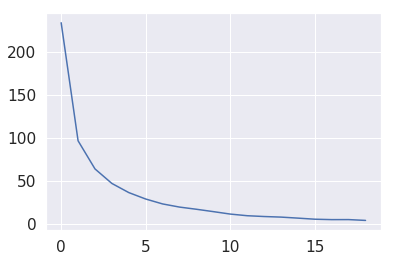

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135]


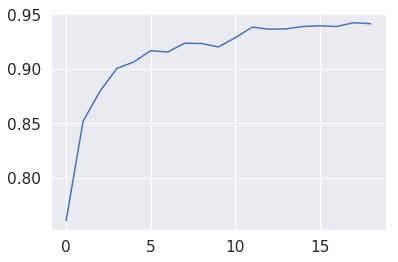

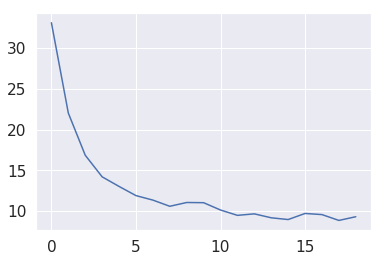


[19] accuracy: 0.941 loss: 9.306

runtime :  8750.060225248337
Train
[20, 00020] loss: 0.315 acc: 0.998
[20, 00040] loss: 0.610 acc: 0.997
[20, 00060] loss: 0.933 acc: 0.997
[20, 00080] loss: 1.251 acc: 0.998
[20, 00100] loss: 1.612 acc: 0.998
[20, 00120] loss: 1.900 acc: 0.998
[20, 00140] loss: 2.229 acc: 0.998
[20, 00160] loss: 2.676 acc: 0.997
[20, 00180] loss: 3.035 acc: 0.997
[20, 00200] loss: 3.302 acc: 0.997
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951, 6.483665633946657, 5.225828543305397, 4.743604276329279, 4.

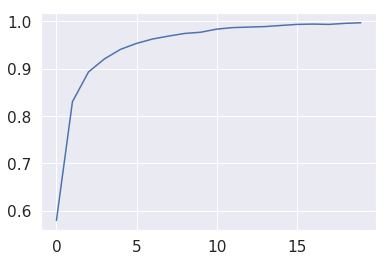

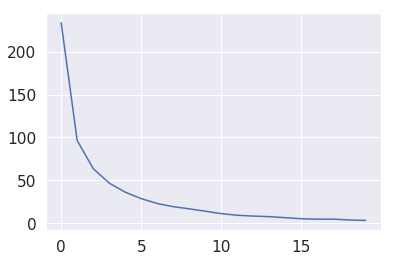

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007]


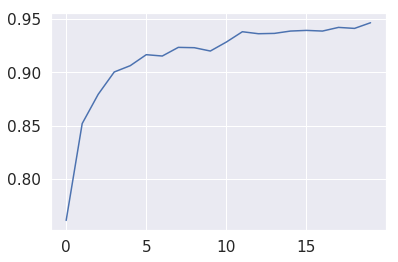

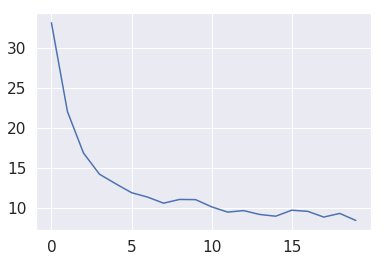


[20] accuracy: 0.947 loss: 8.434

runtime :  9271.588547229767
Train
[21, 00020] loss: 0.313 acc: 0.998
[21, 00040] loss: 0.682 acc: 0.996
[21, 00060] loss: 0.956 acc: 0.997
[21, 00080] loss: 1.390 acc: 0.995
[21, 00100] loss: 1.712 acc: 0.995
[21, 00120] loss: 2.130 acc: 0.995
[21, 00140] loss: 2.459 acc: 0.995
[21, 00160] loss: 2.764 acc: 0.995
[21, 00180] loss: 2.989 acc: 0.996
[21, 00200] loss: 3.362 acc: 0.996
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951, 6.483665633946657, 5.225828543305397, 4.743604

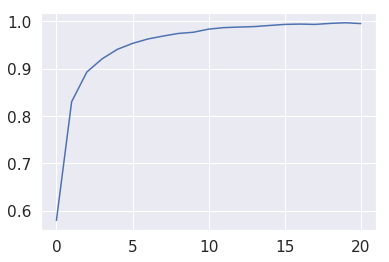

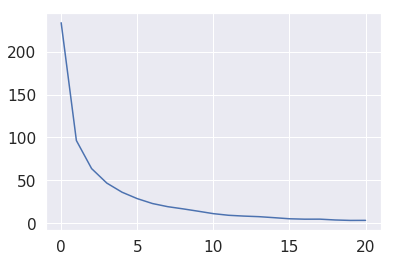

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963]


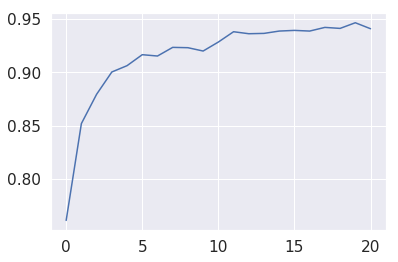

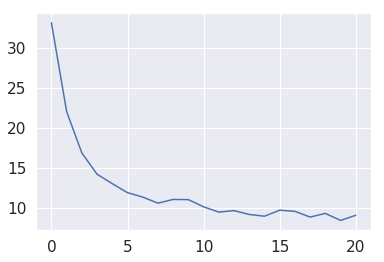


[21] accuracy: 0.941 loss: 9.074

runtime :  9797.148352384567
Train
[22, 00020] loss: 0.268 acc: 0.998
[22, 00040] loss: 0.636 acc: 0.996
[22, 00060] loss: 0.886 acc: 0.996
[22, 00080] loss: 1.219 acc: 0.996
[22, 00100] loss: 1.525 acc: 0.996
[22, 00120] loss: 1.855 acc: 0.996
[22, 00140] loss: 2.150 acc: 0.996
[22, 00160] loss: 2.368 acc: 0.997
[22, 00180] loss: 2.642 acc: 0.997
[22, 00200] loss: 3.005 acc: 0.997
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951, 6.483665633946657, 5.225828543305

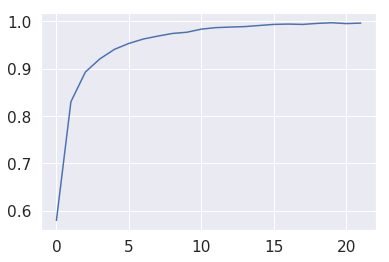

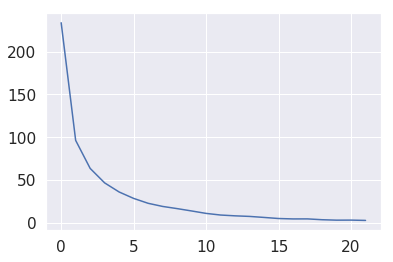

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284]


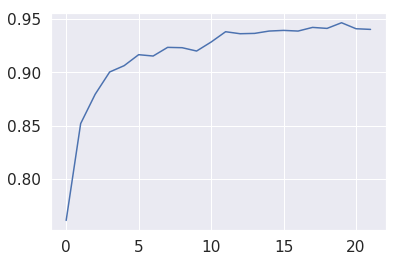

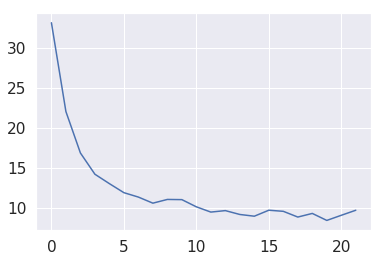


[22] accuracy: 0.940 loss: 9.703

runtime :  10322.361186265945
Train
[23, 00020] loss: 0.259 acc: 0.998
[23, 00040] loss: 0.679 acc: 0.997
[23, 00060] loss: 0.925 acc: 0.997
[23, 00080] loss: 1.162 acc: 0.998
[23, 00100] loss: 1.403 acc: 0.997
[23, 00120] loss: 1.661 acc: 0.997
[23, 00140] loss: 1.898 acc: 0.998
[23, 00160] loss: 2.084 acc: 0.998
[23, 00180] loss: 2.337 acc: 0.998
[23, 00200] loss: 2.561 acc: 0.998
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951, 6.483665633946657, 

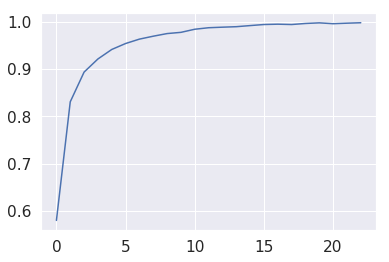

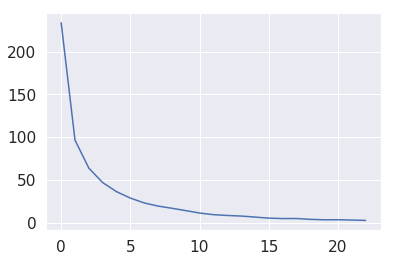

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542]


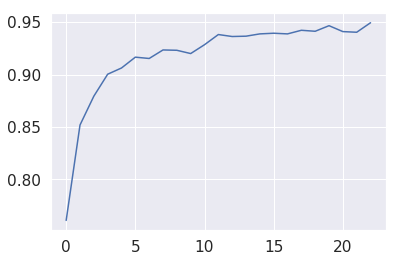

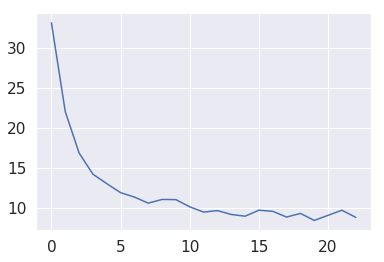


[23] accuracy: 0.949 loss: 8.813

runtime :  10843.284273386002
Train
[24, 00020] loss: 0.441 acc: 0.994
[24, 00040] loss: 0.723 acc: 0.996
[24, 00060] loss: 0.970 acc: 0.997
[24, 00080] loss: 1.199 acc: 0.997
[24, 00100] loss: 1.476 acc: 0.997
[24, 00120] loss: 1.761 acc: 0.998
[24, 00140] loss: 1.953 acc: 0.998
[24, 00160] loss: 2.260 acc: 0.998
[24, 00180] loss: 2.543 acc: 0.998
[24, 00200] loss: 2.717 acc: 0.998
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.672101803123951, 6.4836

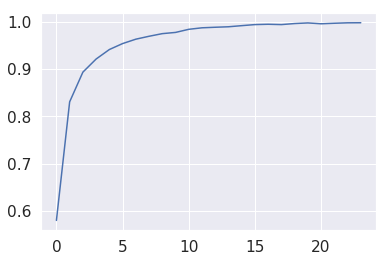

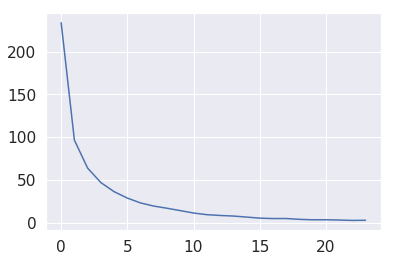

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013]


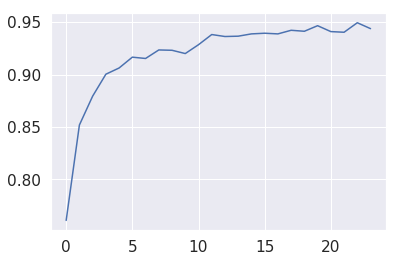

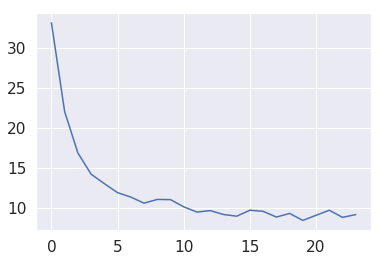


[24] accuracy: 0.944 loss: 9.163

runtime :  11367.895840406418
Train
[25, 00020] loss: 0.334 acc: 0.995
[25, 00040] loss: 0.569 acc: 0.996
[25, 00060] loss: 0.827 acc: 0.997
[25, 00080] loss: 1.045 acc: 0.997
[25, 00100] loss: 1.228 acc: 0.997
[25, 00120] loss: 1.443 acc: 0.997
[25, 00140] loss: 1.671 acc: 0.997
[25, 00160] loss: 1.841 acc: 0.998
[25, 00180] loss: 2.164 acc: 0.997
[25, 00200] loss: 2.358 acc: 0.997
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 7.6721018031

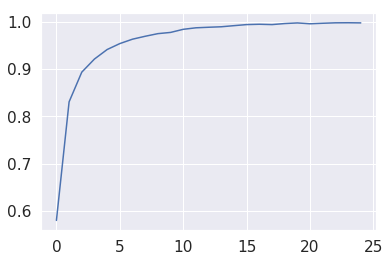

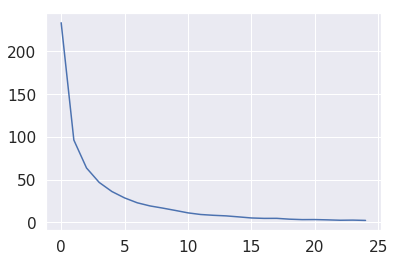

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357]


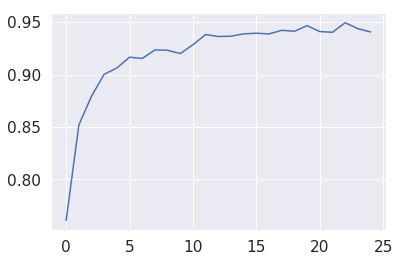

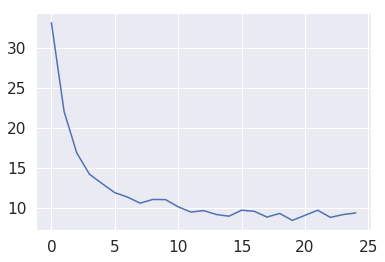


[25] accuracy: 0.941 loss: 9.366

runtime :  11890.20086145401
Train
[26, 00020] loss: 0.232 acc: 0.997
[26, 00040] loss: 0.414 acc: 0.998
[26, 00060] loss: 0.699 acc: 0.997
[26, 00080] loss: 0.954 acc: 0.997
[26, 00100] loss: 1.195 acc: 0.997
[26, 00120] loss: 1.594 acc: 0.996
[26, 00140] loss: 1.797 acc: 0.997
[26, 00160] loss: 1.964 acc: 0.997
[26, 00180] loss: 2.310 acc: 0.997
[26, 00200] loss: 2.590 acc: 0.996
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350306522101164, 

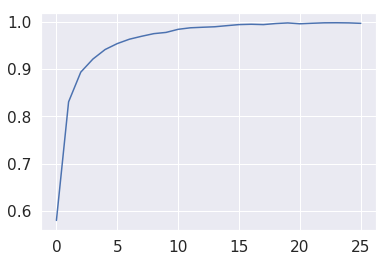

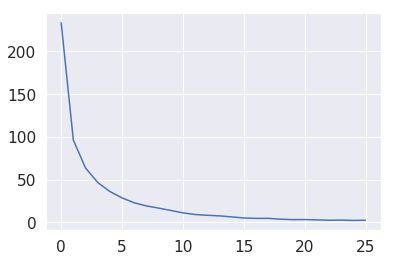

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678]


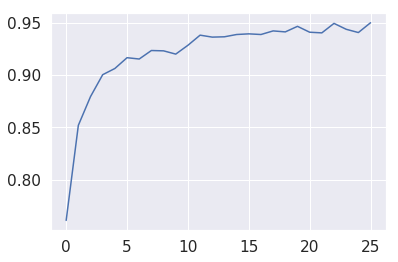

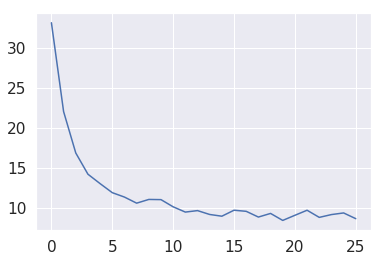


[26] accuracy: 0.950 loss: 8.652

runtime :  12416.200780391693
Train
[27, 00020] loss: 0.154 acc: 0.998
[27, 00040] loss: 0.337 acc: 0.998
[27, 00060] loss: 0.560 acc: 0.998
[27, 00080] loss: 0.741 acc: 0.999
[27, 00100] loss: 0.911 acc: 0.999
[27, 00120] loss: 1.222 acc: 0.998
[27, 00140] loss: 1.437 acc: 0.998
[27, 00160] loss: 1.637 acc: 0.998
[27, 00180] loss: 1.890 acc: 0.998
[27, 00200] loss: 2.057 acc: 0.998
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.286796808242798, 8.350

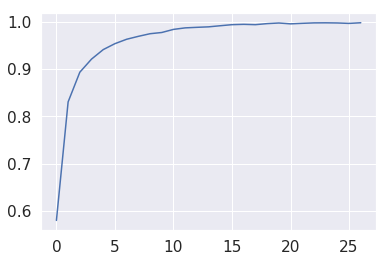

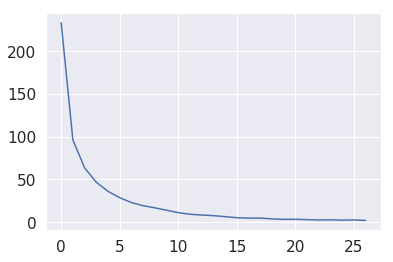

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014]


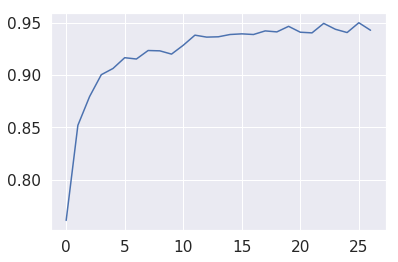

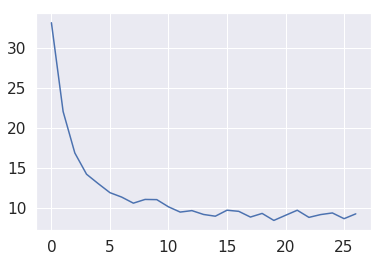


[27] accuracy: 0.943 loss: 9.254

runtime :  12939.331674098969
Train
[28, 00020] loss: 0.182 acc: 1.000
[28, 00040] loss: 0.377 acc: 0.999
[28, 00060] loss: 0.493 acc: 0.999
[28, 00080] loss: 0.642 acc: 0.999
[28, 00100] loss: 0.790 acc: 0.999
[28, 00120] loss: 0.925 acc: 0.999
[28, 00140] loss: 1.045 acc: 1.000
[28, 00160] loss: 1.300 acc: 0.999
[28, 00180] loss: 1.483 acc: 0.999
[28, 00200] loss: 1.673 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264, 9.2867968082

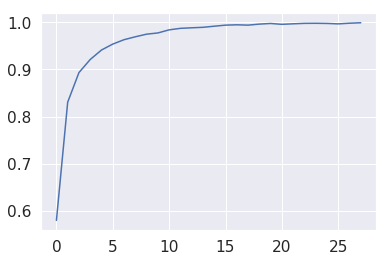

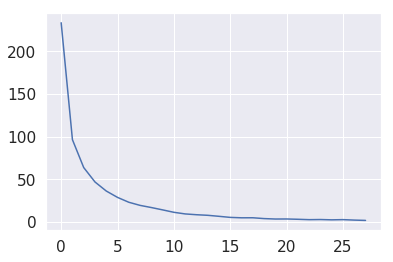

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869]


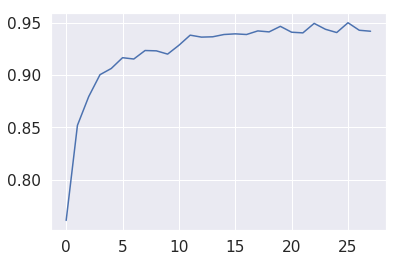

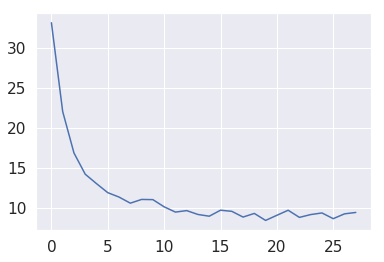


[28] accuracy: 0.942 loss: 9.427

runtime :  13461.192571640015
Train
[29, 00020] loss: 0.137 acc: 0.998
[29, 00040] loss: 0.312 acc: 0.998
[29, 00060] loss: 0.442 acc: 0.999
[29, 00080] loss: 0.645 acc: 0.998
[29, 00100] loss: 0.820 acc: 0.998
[29, 00120] loss: 0.954 acc: 0.999
[29, 00140] loss: 1.103 acc: 0.999
[29, 00160] loss: 1.236 acc: 0.999
[29, 00180] loss: 1.450 acc: 0.999
[29, 00200] loss: 1.568 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189611572772264,

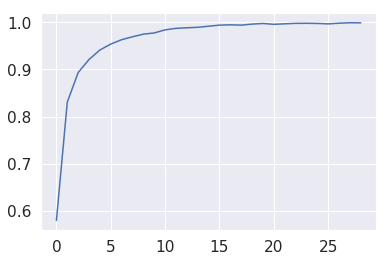

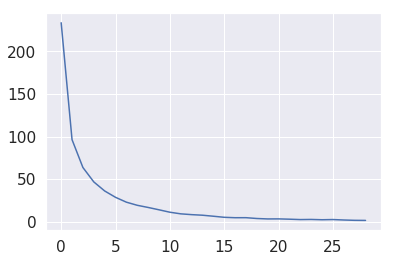

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937]


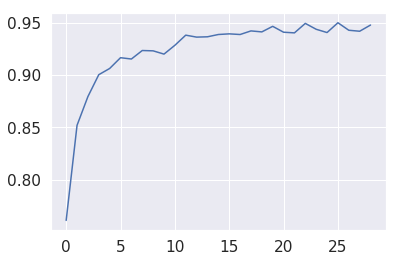

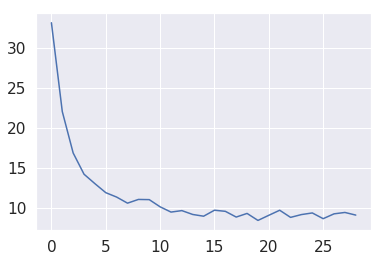


[29] accuracy: 0.948 loss: 9.098

runtime :  13983.849610805511
Train
[30, 00020] loss: 0.136 acc: 0.999
[30, 00040] loss: 0.274 acc: 0.999
[30, 00060] loss: 0.446 acc: 0.999
[30, 00080] loss: 0.639 acc: 0.998
[30, 00100] loss: 0.810 acc: 0.998
[30, 00120] loss: 0.948 acc: 0.998
[30, 00140] loss: 1.087 acc: 0.998
[30, 00160] loss: 1.251 acc: 0.999
[30, 00180] loss: 1.379 acc: 0.999
[30, 00200] loss: 1.589 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609123, 11.189

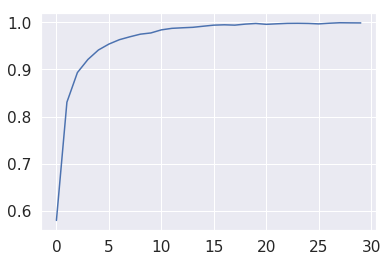

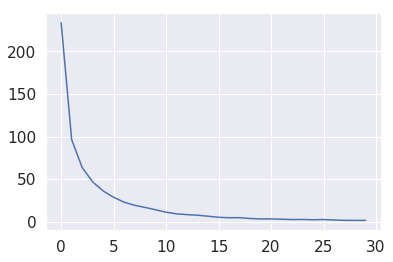

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548]


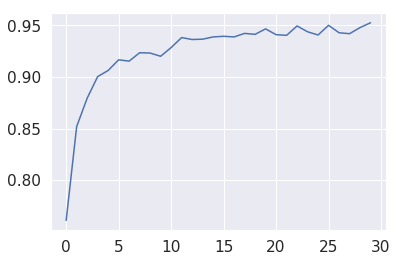

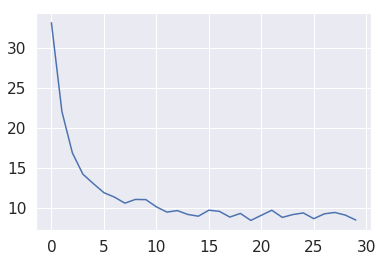


[30] accuracy: 0.953 loss: 8.486

runtime :  14511.217106342316
Train
[31, 00020] loss: 0.229 acc: 0.997
[31, 00040] loss: 0.450 acc: 0.996
[31, 00060] loss: 0.572 acc: 0.997
[31, 00080] loss: 0.717 acc: 0.997
[31, 00100] loss: 0.875 acc: 0.998
[31, 00120] loss: 1.078 acc: 0.998
[31, 00140] loss: 1.177 acc: 0.998
[31, 00160] loss: 1.289 acc: 0.998
[31, 00180] loss: 1.424 acc: 0.998
[31, 00200] loss: 1.550 acc: 0.998
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.033866688609

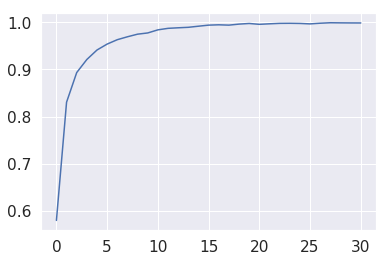

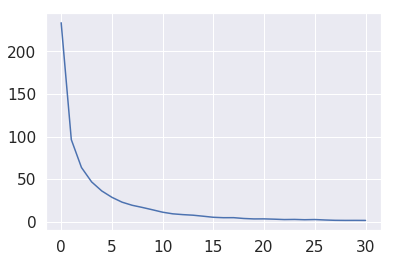

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.12720499932766]


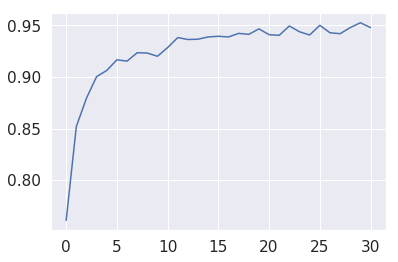

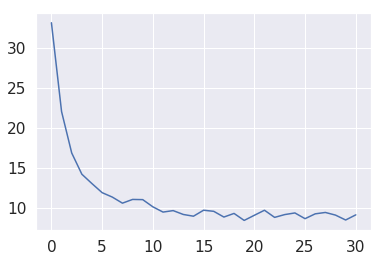


[31] accuracy: 0.948 loss: 9.127

runtime :  15043.383650541306
Train
[32, 00020] loss: 0.160 acc: 0.999
[32, 00040] loss: 0.291 acc: 0.999
[32, 00060] loss: 0.458 acc: 0.999
[32, 00080] loss: 0.570 acc: 0.999
[32, 00100] loss: 0.723 acc: 0.999
[32, 00120] loss: 0.870 acc: 0.999
[32, 00140] loss: 1.004 acc: 0.999
[32, 00160] loss: 1.187 acc: 0.999
[32, 00180] loss: 1.312 acc: 0.999
[32, 00200] loss: 1.467 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851926446, 14.0

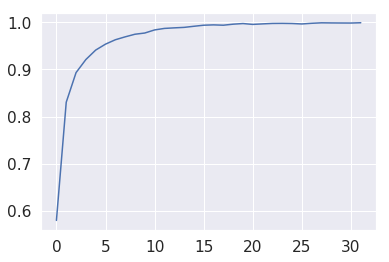

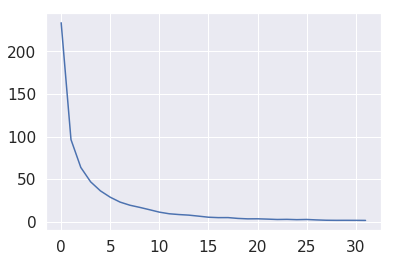

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.12720499932766, 9.426978088915348]


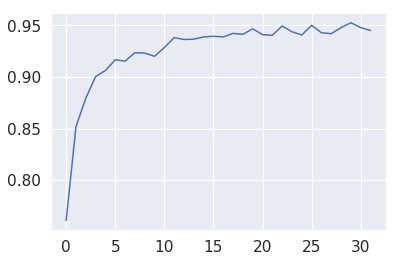

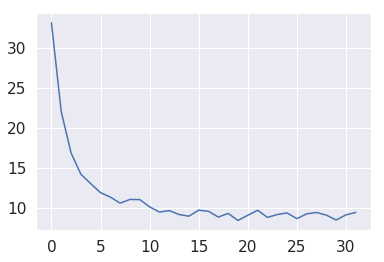


[32] accuracy: 0.945 loss: 9.427

runtime :  15568.176496267319
Train
[33, 00020] loss: 0.204 acc: 0.998
[33, 00040] loss: 0.324 acc: 0.999
[33, 00060] loss: 0.426 acc: 0.999
[33, 00080] loss: 0.534 acc: 0.999
[33, 00100] loss: 0.639 acc: 0.999
[33, 00120] loss: 0.827 acc: 0.999
[33, 00140] loss: 1.038 acc: 0.999
[33, 00160] loss: 1.190 acc: 0.999
[33, 00180] loss: 1.339 acc: 0.999
[33, 00200] loss: 1.495 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658, 16.78131851

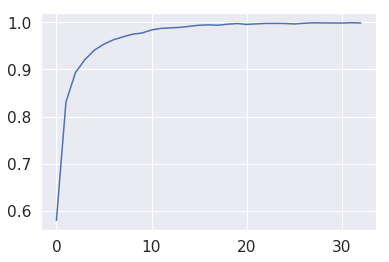

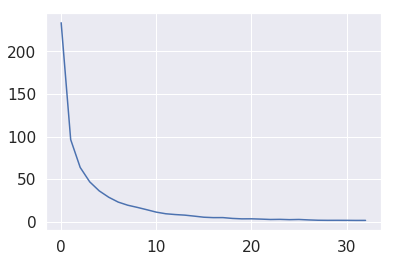

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.12720499932766, 9.426978088915348, 8.783242799341679]


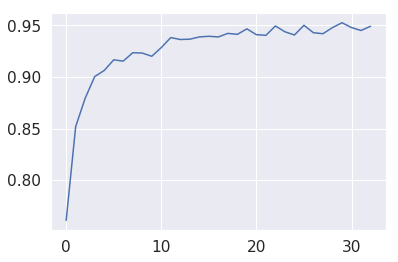

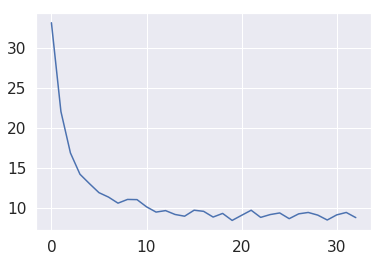


[33] accuracy: 0.949 loss: 8.783

runtime :  16089.502951145172
Train
[34, 00020] loss: 0.112 acc: 0.999
[34, 00040] loss: 0.296 acc: 0.999
[34, 00060] loss: 0.511 acc: 0.998
[34, 00080] loss: 0.644 acc: 0.998
[34, 00100] loss: 0.857 acc: 0.998
[34, 00120] loss: 1.059 acc: 0.998
[34, 00140] loss: 1.274 acc: 0.998
[34, 00160] loss: 1.432 acc: 0.998
[34, 00180] loss: 1.547 acc: 0.998
[34, 00200] loss: 1.727 acc: 0.998
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.31833976134658

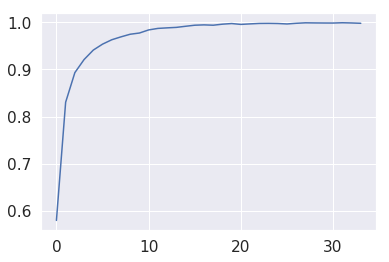

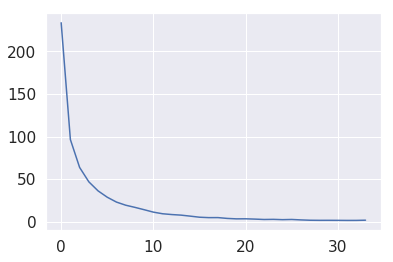

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.12720499932766, 9.426978088915348, 8.783242799341679, 8.209356762468815]


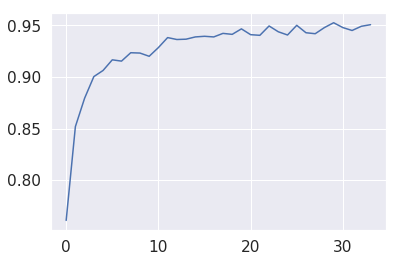

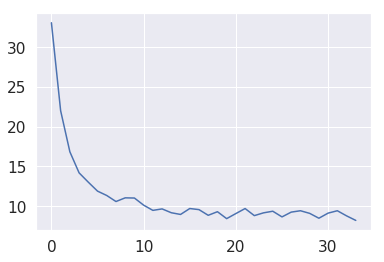


[34] accuracy: 0.951 loss: 8.209

runtime :  16615.39860844612
Train
[35, 00020] loss: 0.156 acc: 0.999
[35, 00040] loss: 0.284 acc: 0.999
[35, 00060] loss: 0.364 acc: 0.999
[35, 00080] loss: 0.532 acc: 0.999
[35, 00100] loss: 0.706 acc: 0.999
[35, 00120] loss: 0.821 acc: 0.999
[35, 00140] loss: 0.947 acc: 0.999
[35, 00160] loss: 1.077 acc: 0.999
[35, 00180] loss: 1.236 acc: 0.999
[35, 00200] loss: 1.367 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.977473367005587, 19.318

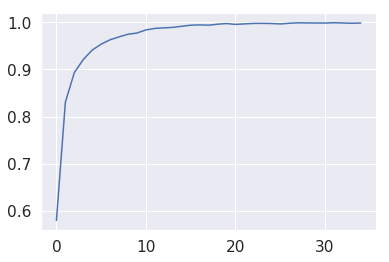

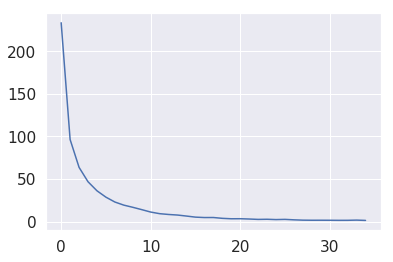

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.12720499932766, 9.426978088915348, 8.783242799341679, 8.20935676

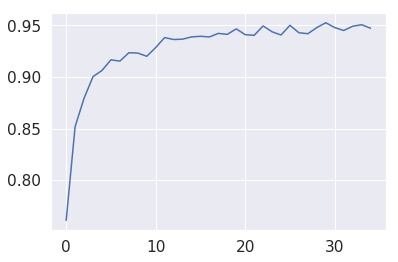

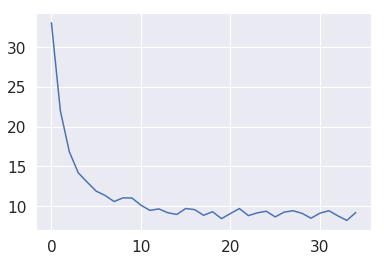


[35] accuracy: 0.947 loss: 9.205

runtime :  17139.678016901016
Train
[36, 00020] loss: 0.152 acc: 0.998
[36, 00040] loss: 0.245 acc: 0.999
[36, 00060] loss: 0.391 acc: 0.999
[36, 00080] loss: 0.545 acc: 0.998
[36, 00100] loss: 0.635 acc: 0.999
[36, 00120] loss: 0.700 acc: 0.999
[36, 00140] loss: 0.784 acc: 0.999
[36, 00160] loss: 0.933 acc: 0.999
[36, 00180] loss: 1.056 acc: 0.999
[36, 00200] loss: 1.149 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22.9774733670

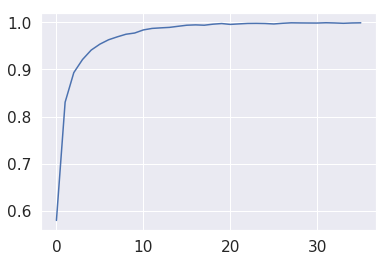

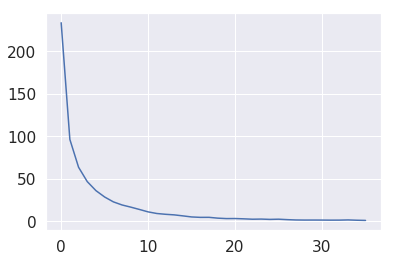

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.12720499932766, 9.426978088915348, 8.783242799341679, 

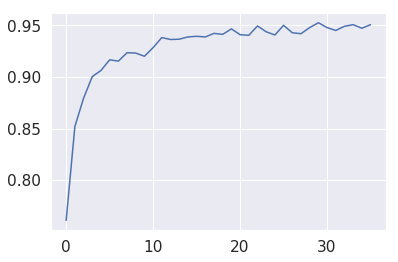

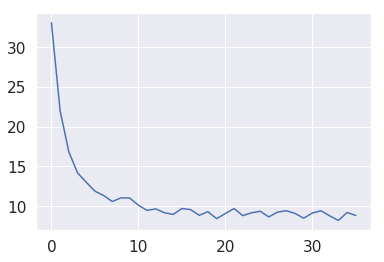


[36] accuracy: 0.951 loss: 8.836

runtime :  17662.433693647385
Train
[37, 00020] loss: 0.127 acc: 0.999
[37, 00040] loss: 0.210 acc: 0.999
[37, 00060] loss: 0.352 acc: 0.998
[37, 00080] loss: 0.475 acc: 0.999
[37, 00100] loss: 0.626 acc: 0.999
[37, 00120] loss: 0.706 acc: 0.999
[37, 00140] loss: 0.773 acc: 0.999
[37, 00160] loss: 0.906 acc: 0.999
[37, 00180] loss: 1.042 acc: 0.999
[37, 00200] loss: 1.156 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.68662767857313, 22

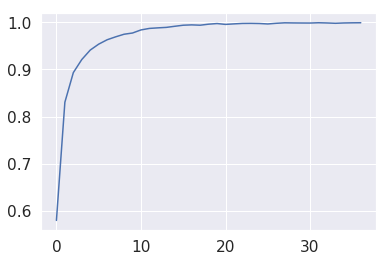

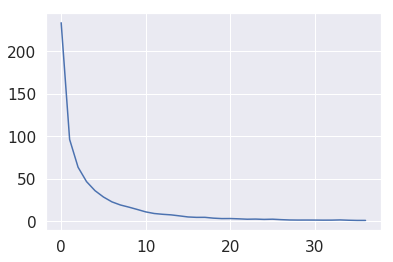

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.12720499932766, 9.426978088915348, 8.783242

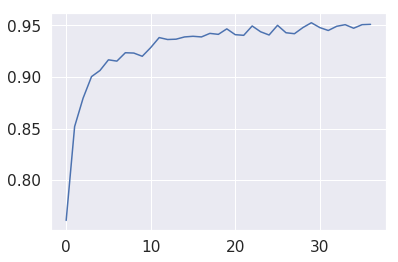

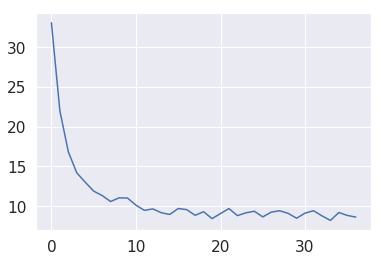


[37] accuracy: 0.951 loss: 8.626

runtime :  18185.799379348755
Train
[38, 00020] loss: 0.076 acc: 1.000
[38, 00040] loss: 0.134 acc: 1.000
[38, 00060] loss: 0.207 acc: 1.000
[38, 00080] loss: 0.275 acc: 1.000
[38, 00100] loss: 0.367 acc: 1.000
[38, 00120] loss: 0.440 acc: 1.000
[38, 00140] loss: 0.542 acc: 1.000
[38, 00160] loss: 0.651 acc: 1.000
[38, 00180] loss: 0.743 acc: 1.000
[38, 00200] loss: 0.828 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.16197677701712, 28.686627

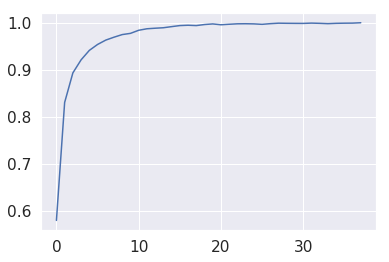

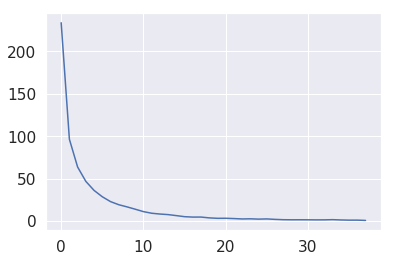

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.12720499932766, 9.426978088915348,

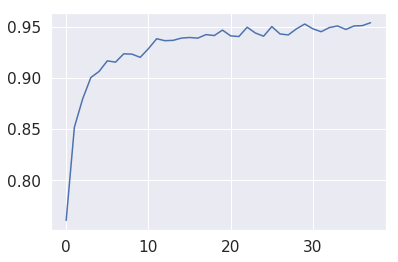

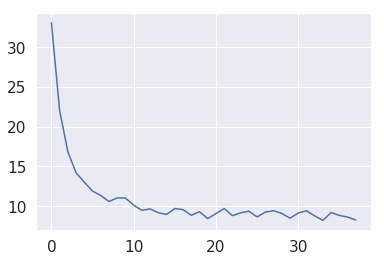


[38] accuracy: 0.954 loss: 8.259

runtime :  18707.62024950981
Train
[39, 00020] loss: 0.084 acc: 0.999
[39, 00040] loss: 0.157 acc: 1.000
[39, 00060] loss: 0.278 acc: 0.999
[39, 00080] loss: 0.363 acc: 0.999
[39, 00100] loss: 0.513 acc: 0.999
[39, 00120] loss: 0.591 acc: 0.999
[39, 00140] loss: 0.680 acc: 0.999
[39, 00160] loss: 0.774 acc: 0.999
[39, 00180] loss: 0.884 acc: 0.999
[39, 00200] loss: 0.988 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.1619767770171

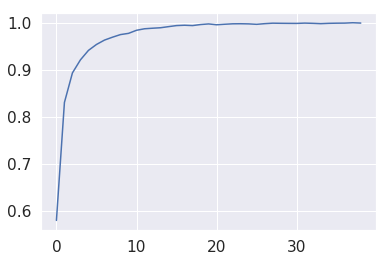

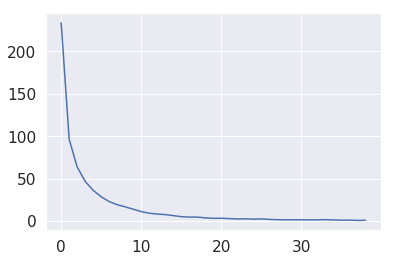

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.12720499932766, 9.426978

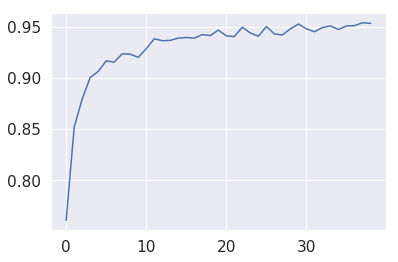

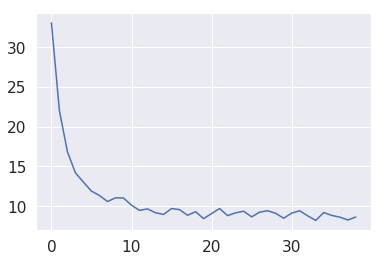


[39] accuracy: 0.953 loss: 8.638

runtime :  19231.585465431213
Train
[40, 00020] loss: 0.097 acc: 0.998
[40, 00040] loss: 0.237 acc: 0.998
[40, 00060] loss: 0.347 acc: 0.999
[40, 00080] loss: 0.445 acc: 0.999
[40, 00100] loss: 0.531 acc: 0.999
[40, 00120] loss: 0.591 acc: 0.999
[40, 00140] loss: 0.723 acc: 0.999
[40, 00160] loss: 0.797 acc: 0.999
[40, 00180] loss: 0.873 acc: 0.999
[40, 00200] loss: 0.984 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192177296, 36.1

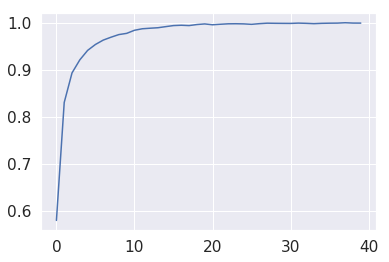

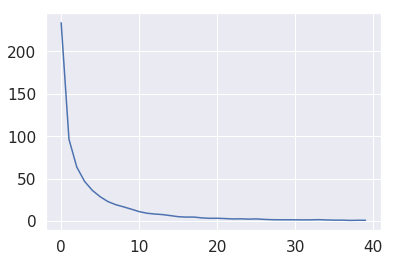

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.12720499932766, 9.

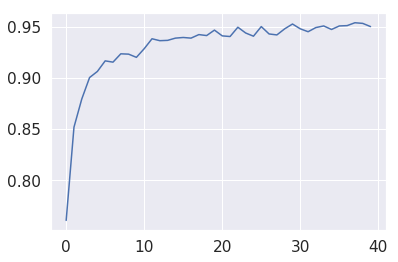

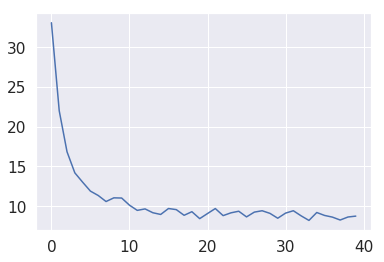


[40] accuracy: 0.950 loss: 8.750

runtime :  19755.35944700241
Train
[41, 00020] loss: 0.110 acc: 0.998
[41, 00040] loss: 0.196 acc: 0.998
[41, 00060] loss: 0.350 acc: 0.998
[41, 00080] loss: 0.431 acc: 0.998
[41, 00100] loss: 0.567 acc: 0.998
[41, 00120] loss: 0.754 acc: 0.998
[41, 00140] loss: 0.893 acc: 0.998
[41, 00160] loss: 0.981 acc: 0.998
[41, 00180] loss: 1.093 acc: 0.998
[41, 00200] loss: 1.276 acc: 0.998
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375]
[233.61620274186134, 96.38189399242401, 63.68513681739569, 46.783800192

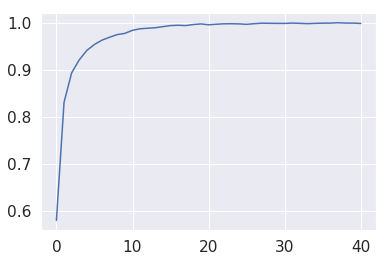

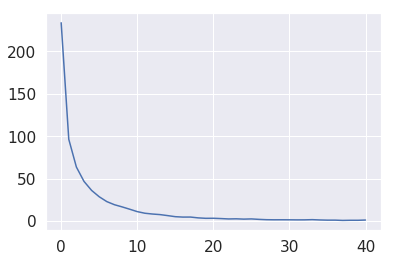

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548, 9.1272049

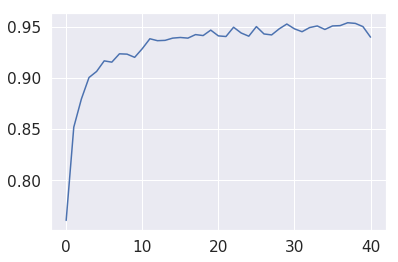

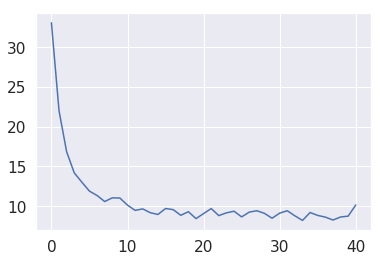


[41] accuracy: 0.940 loss: 10.156

runtime :  20277.46480536461
Train
[42, 00020] loss: 0.135 acc: 0.999
[42, 00040] loss: 0.244 acc: 0.999
[42, 00060] loss: 0.324 acc: 0.999
[42, 00080] loss: 0.397 acc: 1.000
[42, 00100] loss: 0.481 acc: 1.000
[42, 00120] loss: 0.542 acc: 1.000
[42, 00140] loss: 0.703 acc: 0.999
[42, 00160] loss: 0.824 acc: 0.999
[42, 00180] loss: 0.921 acc: 0.999
[42, 00200] loss: 1.042 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875]
[233.61620274186134, 96.38189399242401, 63.68513681739569,

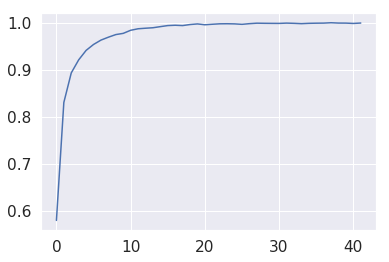

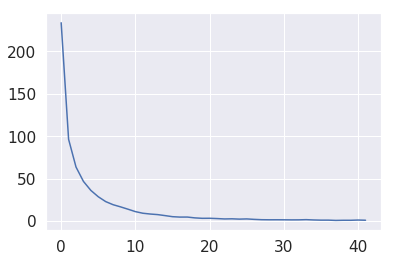

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819973051548,

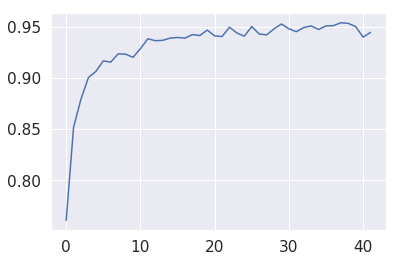

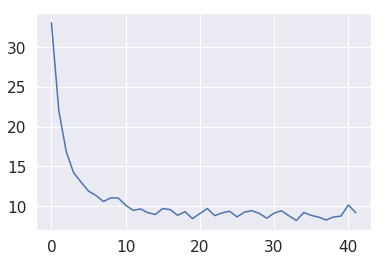


[42] accuracy: 0.944 loss: 9.178

runtime :  20801.715994358063
Train
[43, 00020] loss: 0.069 acc: 1.000
[43, 00040] loss: 0.152 acc: 1.000
[43, 00060] loss: 0.222 acc: 1.000
[43, 00080] loss: 0.341 acc: 1.000
[43, 00100] loss: 0.474 acc: 0.999
[43, 00120] loss: 0.566 acc: 0.999
[43, 00140] loss: 0.704 acc: 0.999
[43, 00160] loss: 0.794 acc: 0.999
[43, 00180] loss: 0.946 acc: 0.999
[43, 00200] loss: 1.040 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875]
[233.61620274186134, 96.38189399242401, 63.68

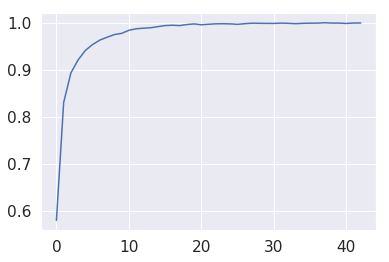

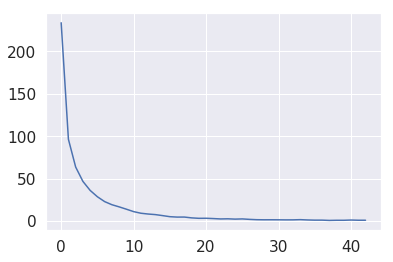

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.097536507993937, 8.485819

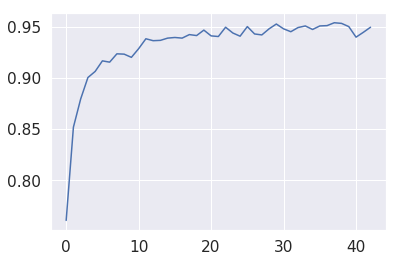

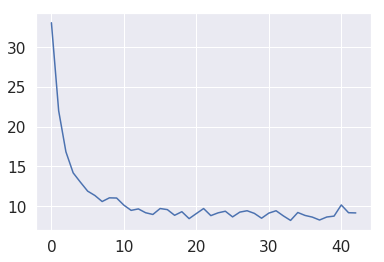


[43] accuracy: 0.949 loss: 9.153

runtime :  21325.870584011078
Train
[44, 00020] loss: 0.089 acc: 0.998
[44, 00040] loss: 0.136 acc: 0.999
[44, 00060] loss: 0.204 acc: 0.999
[44, 00080] loss: 0.281 acc: 0.999
[44, 00100] loss: 0.406 acc: 0.999
[44, 00120] loss: 0.528 acc: 0.999
[44, 00140] loss: 0.626 acc: 0.999
[44, 00160] loss: 0.693 acc: 0.999
[44, 00180] loss: 0.768 acc: 0.999
[44, 00200] loss: 0.832 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375]
[233.61620274186134, 96.38189399242

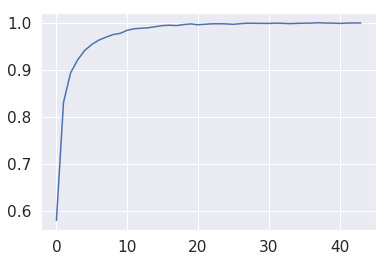

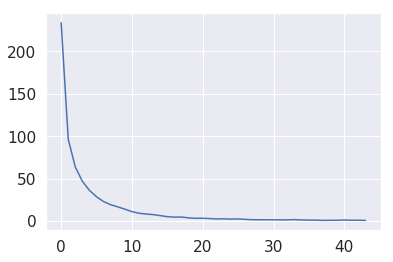

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.09753650799393

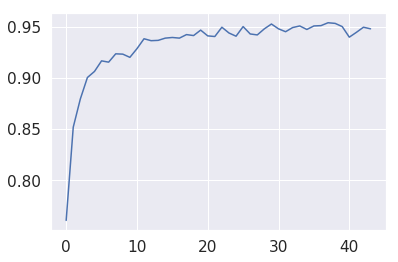

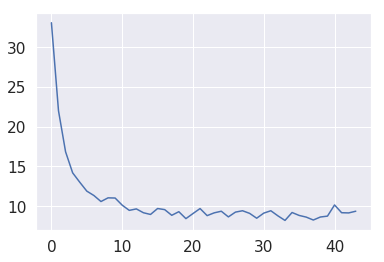


[44] accuracy: 0.948 loss: 9.368

runtime :  21852.99511551857
Train
[45, 00020] loss: 0.042 acc: 1.000
[45, 00040] loss: 0.137 acc: 0.999
[45, 00060] loss: 0.208 acc: 0.999
[45, 00080] loss: 0.295 acc: 0.999
[45, 00100] loss: 0.367 acc: 0.999
[45, 00120] loss: 0.440 acc: 0.999
[45, 00140] loss: 0.511 acc: 0.999
[45, 00160] loss: 0.595 acc: 1.000
[45, 00180] loss: 0.662 acc: 1.000
[45, 00200] loss: 0.740 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125]
[233.61620274186134, 96.

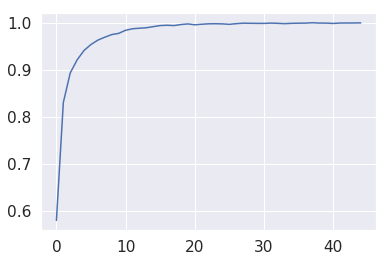

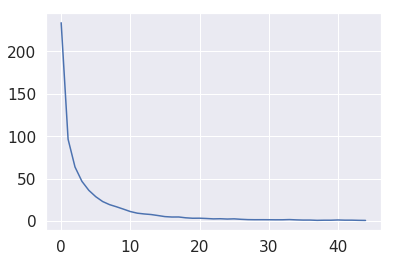

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.09753650

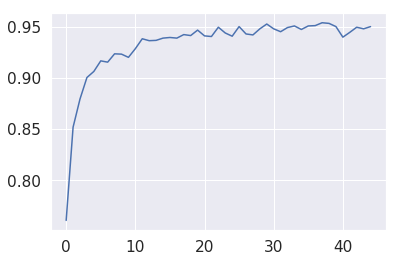

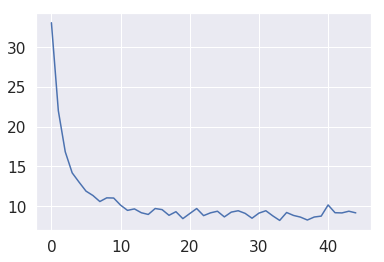


[45] accuracy: 0.950 loss: 9.158

runtime :  22381.488216161728
Train
[46, 00020] loss: 0.116 acc: 0.998
[46, 00040] loss: 0.232 acc: 0.998
[46, 00060] loss: 0.311 acc: 0.999
[46, 00080] loss: 0.380 acc: 0.999
[46, 00100] loss: 0.420 acc: 0.999
[46, 00120] loss: 0.469 acc: 0.999
[46, 00140] loss: 0.601 acc: 0.999
[46, 00160] loss: 0.693 acc: 0.999
[46, 00180] loss: 0.744 acc: 0.999
[46, 00200] loss: 0.834 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125]
[233.616202

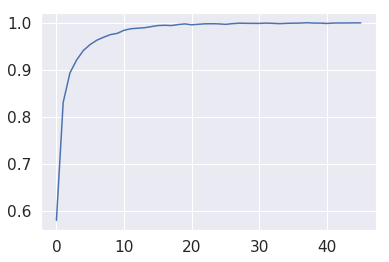

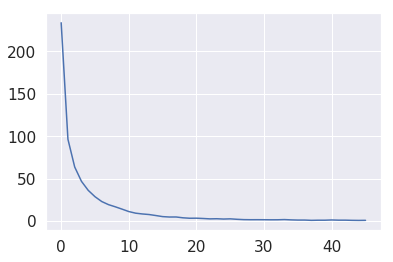

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310752869, 9.0

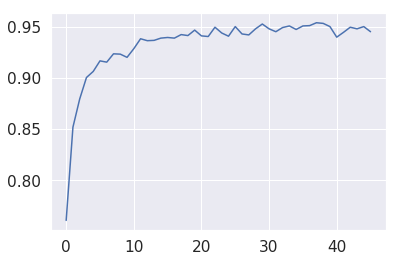

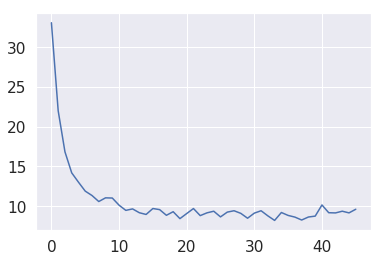


[46] accuracy: 0.945 loss: 9.616

runtime :  22909.95827817917
Train
[47, 00020] loss: 0.048 acc: 1.000
[47, 00040] loss: 0.122 acc: 1.000
[47, 00060] loss: 0.230 acc: 0.999
[47, 00080] loss: 0.285 acc: 1.000
[47, 00100] loss: 0.429 acc: 0.999
[47, 00120] loss: 0.495 acc: 0.999
[47, 00140] loss: 0.553 acc: 0.999
[47, 00160] loss: 0.662 acc: 0.999
[47, 00180] loss: 0.716 acc: 0.999
[47, 00200] loss: 0.787 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125]

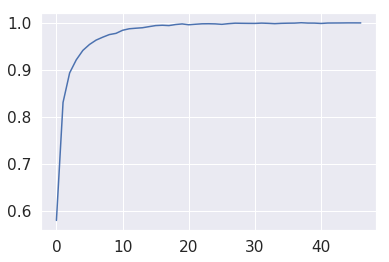

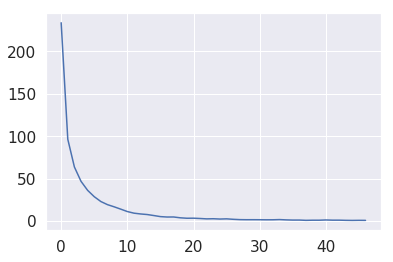

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 9.427002310

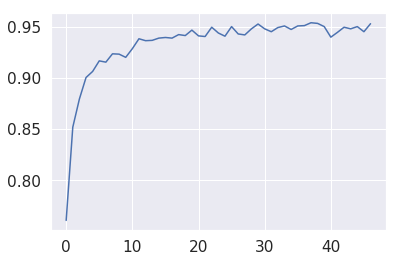

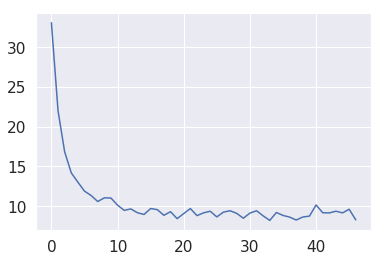


[47] accuracy: 0.953 loss: 8.278

runtime :  23436.293102264404
Train
[48, 00020] loss: 0.048 acc: 1.000
[48, 00040] loss: 0.103 acc: 1.000
[48, 00060] loss: 0.189 acc: 0.999
[48, 00080] loss: 0.229 acc: 1.000
[48, 00100] loss: 0.301 acc: 1.000
[48, 00120] loss: 0.362 acc: 1.000
[48, 00140] loss: 0.464 acc: 1.000
[48, 00160] loss: 0.536 acc: 1.000
[48, 00180] loss: 0.594 acc: 1.000
[48, 00200] loss: 0.677 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

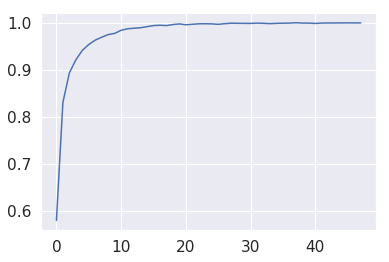

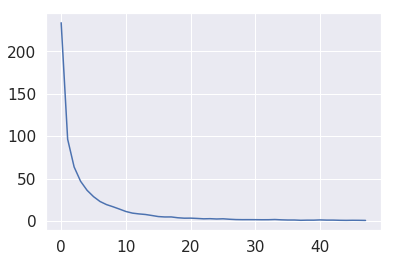

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242926836014, 

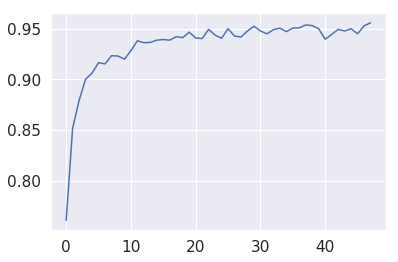

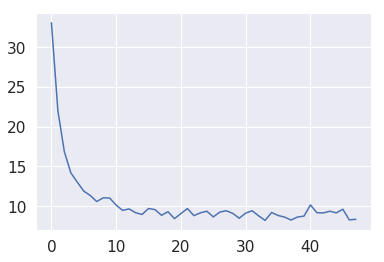


[48] accuracy: 0.956 loss: 8.351

runtime :  23961.411653280258
Train
[49, 00020] loss: 0.073 acc: 0.999
[49, 00040] loss: 0.179 acc: 0.999
[49, 00060] loss: 0.252 acc: 0.999
[49, 00080] loss: 0.281 acc: 0.999
[49, 00100] loss: 0.358 acc: 0.999
[49, 00120] loss: 0.406 acc: 0.999
[49, 00140] loss: 0.474 acc: 0.999
[49, 00160] loss: 0.538 acc: 0.999
[49, 00180] loss: 0.615 acc: 0.999
[49, 00200] loss: 0.736 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

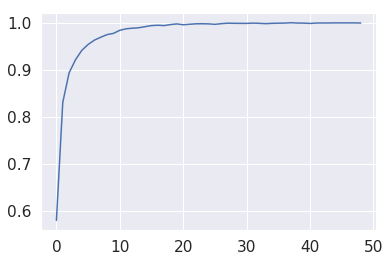

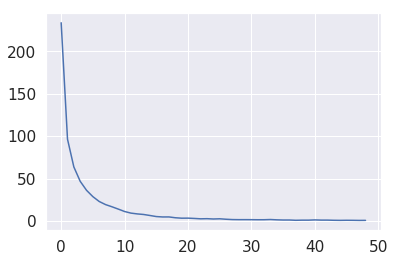

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652104455977678, 9.254242

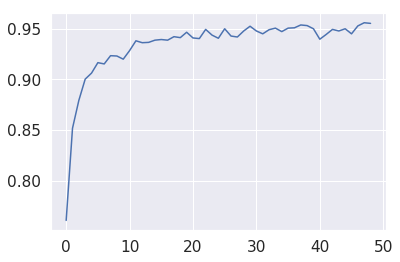

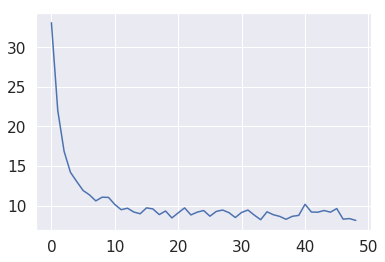


[49] accuracy: 0.955 loss: 8.118

runtime :  24488.482621908188
Train
[50, 00020] loss: 0.104 acc: 0.999
[50, 00040] loss: 0.139 acc: 1.000
[50, 00060] loss: 0.203 acc: 0.999
[50, 00080] loss: 0.245 acc: 1.000
[50, 00100] loss: 0.333 acc: 0.999
[50, 00120] loss: 0.402 acc: 0.999
[50, 00140] loss: 0.610 acc: 0.999
[50, 00160] loss: 0.676 acc: 0.999
[50, 00180] loss: 0.834 acc: 0.999
[50, 00200] loss: 0.900 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

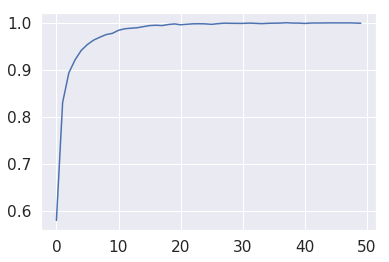

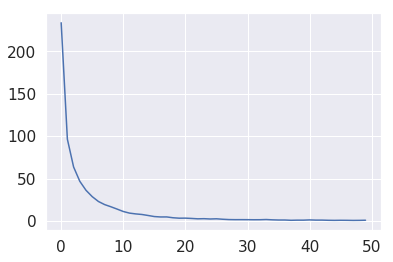

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.65210445597767

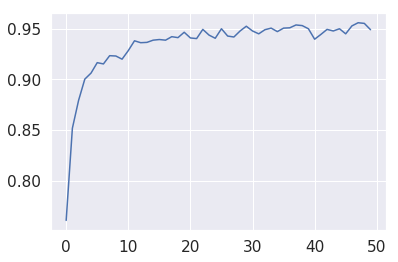

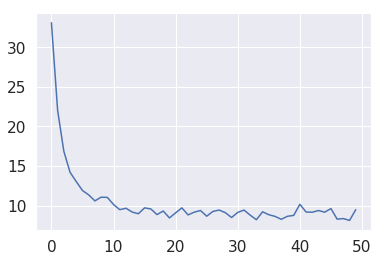


[50] accuracy: 0.949 loss: 9.479

runtime :  25013.545660972595
Train
[51, 00020] loss: 0.074 acc: 0.999
[51, 00040] loss: 0.104 acc: 1.000
[51, 00060] loss: 0.171 acc: 0.999
[51, 00080] loss: 0.227 acc: 1.000
[51, 00100] loss: 0.375 acc: 1.000
[51, 00120] loss: 0.512 acc: 0.999
[51, 00140] loss: 0.579 acc: 0.999
[51, 00160] loss: 0.646 acc: 0.999
[51, 00180] loss: 0.755 acc: 0.999
[51, 00200] loss: 0.806 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

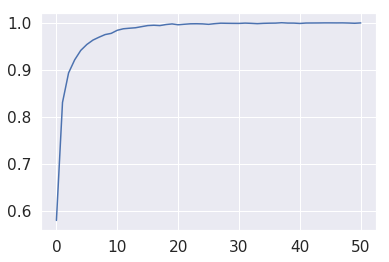

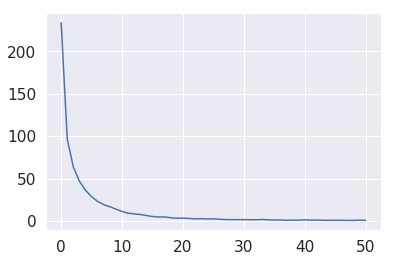

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.366120908409357, 8.652

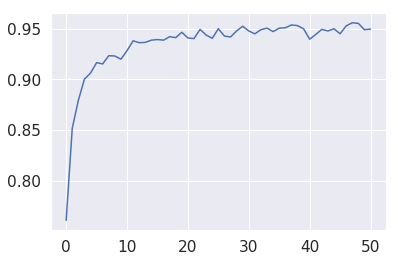

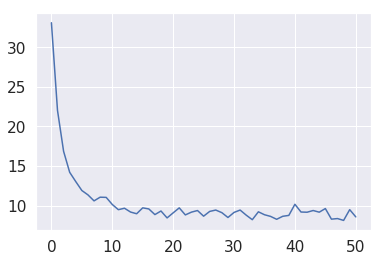


[51] accuracy: 0.950 loss: 8.565

runtime :  25539.45203280449
Train
[52, 00020] loss: 0.056 acc: 1.000
[52, 00040] loss: 0.157 acc: 1.000
[52, 00060] loss: 0.226 acc: 0.999
[52, 00080] loss: 0.289 acc: 1.000
[52, 00100] loss: 0.375 acc: 0.999
[52, 00120] loss: 0.430 acc: 0.999
[52, 00140] loss: 0.550 acc: 0.999
[52, 00160] loss: 0.623 acc: 0.999
[52, 00180] loss: 0.666 acc: 0.999
[52, 00200] loss: 0.737 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

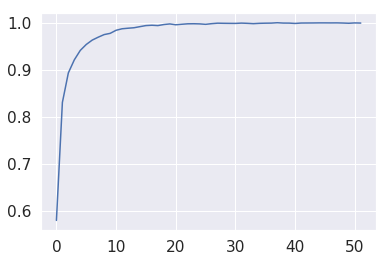

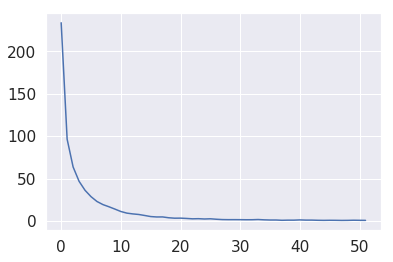

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.36612090840935

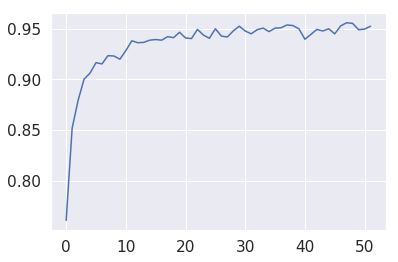

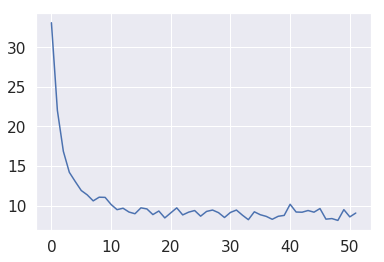


[52] accuracy: 0.953 loss: 9.049

runtime :  26064.1949532032
Train
[53, 00020] loss: 0.079 acc: 0.999
[53, 00040] loss: 0.111 acc: 1.000
[53, 00060] loss: 0.146 acc: 1.000
[53, 00080] loss: 0.197 acc: 1.000
[53, 00100] loss: 0.295 acc: 0.999
[53, 00120] loss: 0.367 acc: 0.999
[53, 00140] loss: 0.408 acc: 0.999
[53, 00160] loss: 0.477 acc: 0.999
[53, 00180] loss: 0.536 acc: 0.999
[53, 00200] loss: 0.590 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125, 

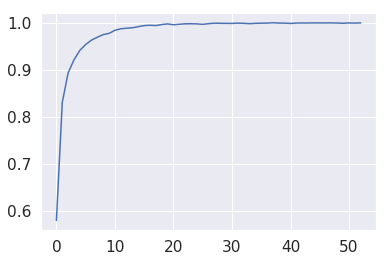

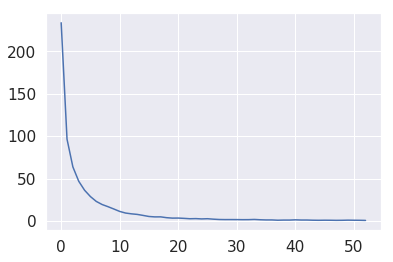

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966013, 9.3661

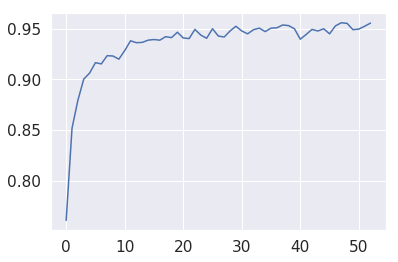

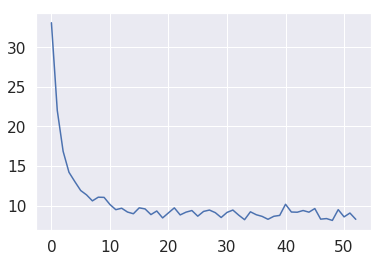


[53] accuracy: 0.956 loss: 8.255

runtime :  26591.14938879013
Train
[54, 00020] loss: 0.055 acc: 1.000
[54, 00040] loss: 0.134 acc: 1.000
[54, 00060] loss: 0.198 acc: 1.000
[54, 00080] loss: 0.264 acc: 1.000
[54, 00100] loss: 0.302 acc: 1.000
[54, 00120] loss: 0.392 acc: 1.000
[54, 00140] loss: 0.436 acc: 1.000
[54, 00160] loss: 0.492 acc: 1.000
[54, 00180] loss: 0.528 acc: 1.000
[54, 00200] loss: 0.592 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

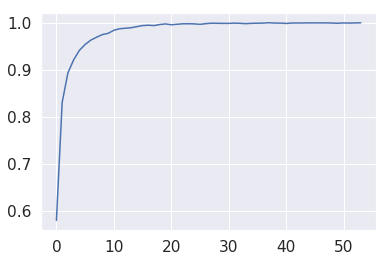

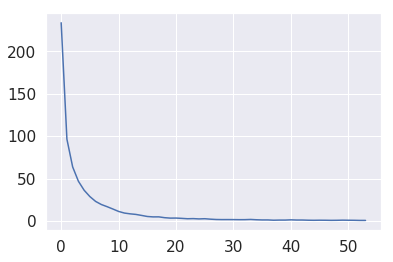

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.16286662966

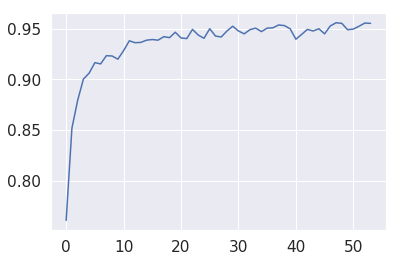

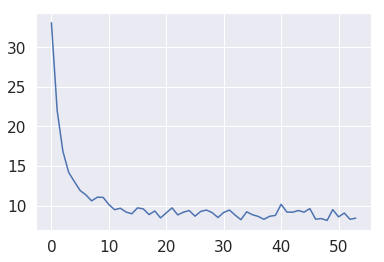


[54] accuracy: 0.955 loss: 8.406

runtime :  27116.89977312088
Train
[55, 00020] loss: 0.045 acc: 1.000
[55, 00040] loss: 0.106 acc: 1.000
[55, 00060] loss: 0.176 acc: 1.000
[55, 00080] loss: 0.244 acc: 1.000
[55, 00100] loss: 0.283 acc: 1.000
[55, 00120] loss: 0.310 acc: 1.000
[55, 00140] loss: 0.384 acc: 1.000
[55, 00160] loss: 0.422 acc: 1.000
[55, 00180] loss: 0.473 acc: 1.000
[55, 00200] loss: 0.539 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

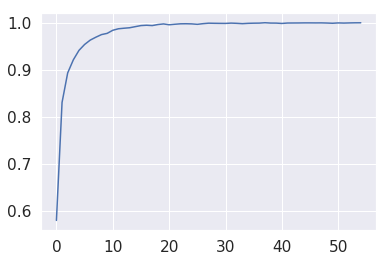

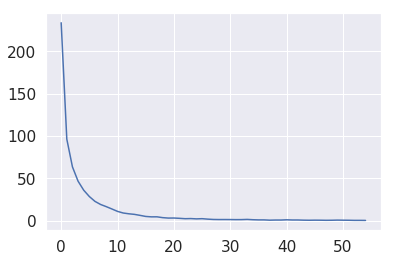

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.812735177576542, 9.

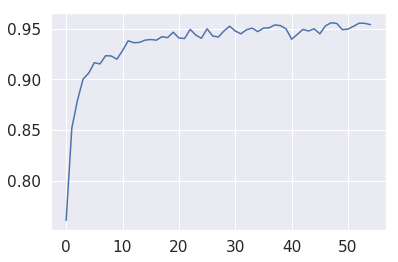

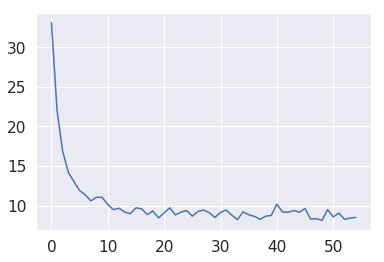


[55] accuracy: 0.954 loss: 8.495

runtime :  27644.832582712173
Train
[56, 00020] loss: 0.124 acc: 0.998
[56, 00040] loss: 0.198 acc: 0.998
[56, 00060] loss: 0.252 acc: 0.999
[56, 00080] loss: 0.319 acc: 0.999
[56, 00100] loss: 0.380 acc: 0.999
[56, 00120] loss: 0.428 acc: 0.999
[56, 00140] loss: 0.464 acc: 0.999
[56, 00160] loss: 0.495 acc: 0.999
[56, 00180] loss: 0.536 acc: 0.999
[56, 00200] loss: 0.577 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

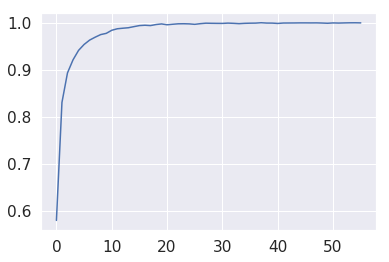

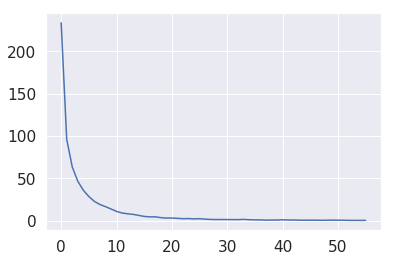

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8.8127351775

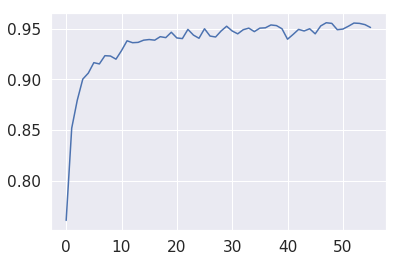

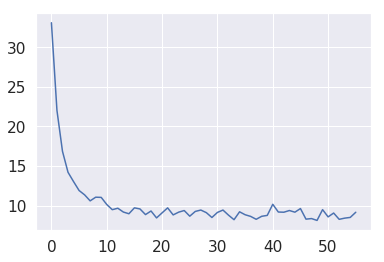


[56] accuracy: 0.951 loss: 9.150

runtime :  28170.23281288147
Train
[57, 00020] loss: 0.049 acc: 0.999
[57, 00040] loss: 0.094 acc: 1.000
[57, 00060] loss: 0.150 acc: 1.000
[57, 00080] loss: 0.185 acc: 1.000
[57, 00100] loss: 0.264 acc: 1.000
[57, 00120] loss: 0.325 acc: 1.000
[57, 00140] loss: 0.442 acc: 0.999
[57, 00160] loss: 0.486 acc: 1.000
[57, 00180] loss: 0.605 acc: 0.999
[57, 00200] loss: 0.645 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

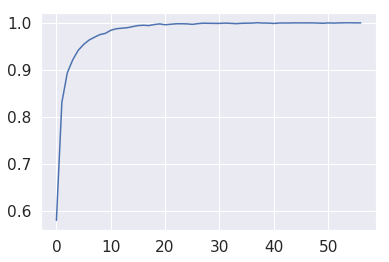

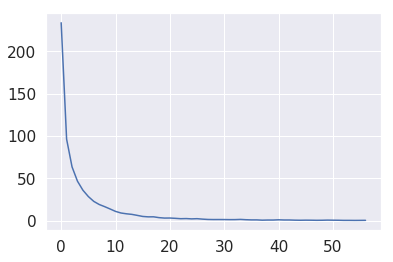

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.703320264816284, 8

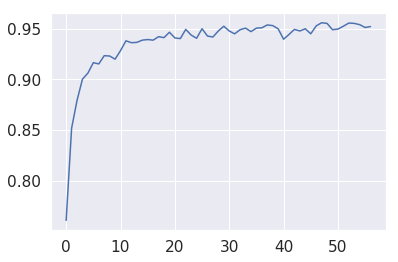

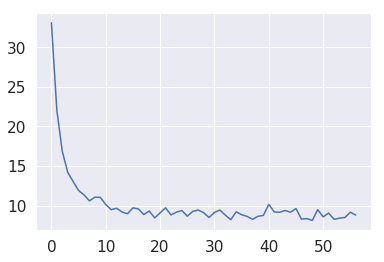


[57] accuracy: 0.952 loss: 8.790

runtime :  28697.47429585457
Train
[58, 00020] loss: 0.064 acc: 0.999
[58, 00040] loss: 0.118 acc: 1.000
[58, 00060] loss: 0.173 acc: 1.000
[58, 00080] loss: 0.220 acc: 1.000
[58, 00100] loss: 0.254 acc: 1.000
[58, 00120] loss: 0.340 acc: 1.000
[58, 00140] loss: 0.411 acc: 0.999
[58, 00160] loss: 0.449 acc: 1.000
[58, 00180] loss: 0.532 acc: 0.999
[58, 00200] loss: 0.571 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

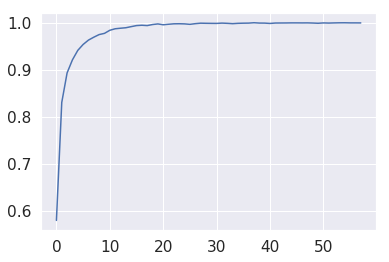

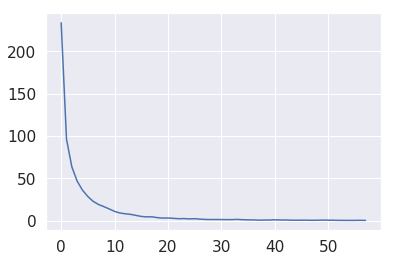

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963, 9.7033202

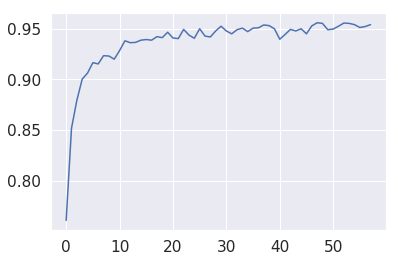

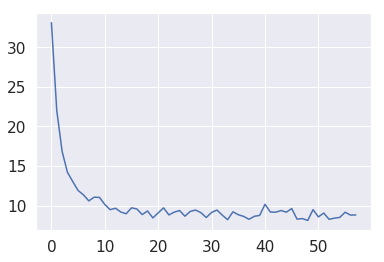


[58] accuracy: 0.954 loss: 8.812

runtime :  29223.49550485611
Train
[59, 00020] loss: 0.032 acc: 1.000
[59, 00040] loss: 0.062 acc: 1.000
[59, 00060] loss: 0.165 acc: 0.999
[59, 00080] loss: 0.204 acc: 0.999
[59, 00100] loss: 0.309 acc: 0.999
[59, 00120] loss: 0.371 acc: 0.999
[59, 00140] loss: 0.441 acc: 0.999
[59, 00160] loss: 0.489 acc: 0.999
[59, 00180] loss: 0.525 acc: 0.999
[59, 00200] loss: 0.570 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

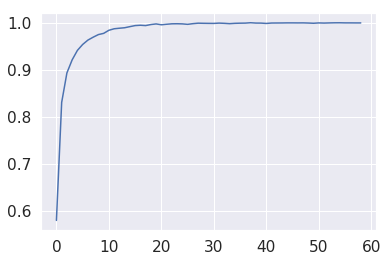

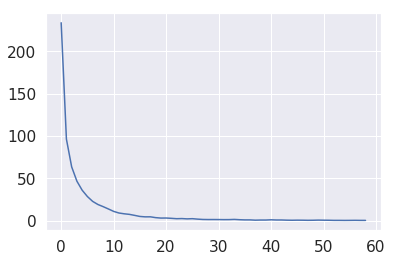

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.073691315948963

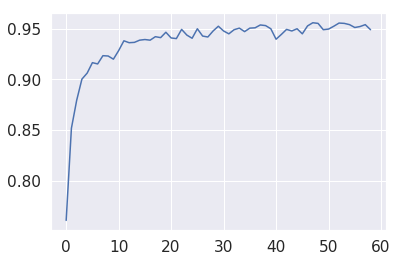

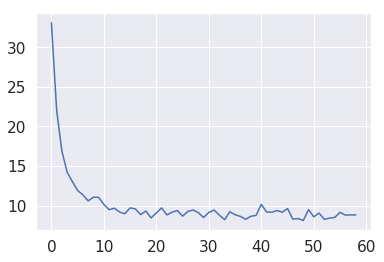


[59] accuracy: 0.949 loss: 8.812

runtime :  29751.177487134933
Train
[60, 00020] loss: 0.046 acc: 0.999
[60, 00040] loss: 0.086 acc: 1.000
[60, 00060] loss: 0.117 acc: 1.000
[60, 00080] loss: 0.202 acc: 1.000
[60, 00100] loss: 0.242 acc: 1.000
[60, 00120] loss: 0.302 acc: 1.000
[60, 00140] loss: 0.339 acc: 1.000
[60, 00160] loss: 0.380 acc: 1.000
[60, 00180] loss: 0.428 acc: 1.000
[60, 00200] loss: 0.466 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

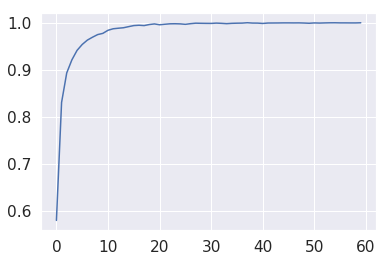

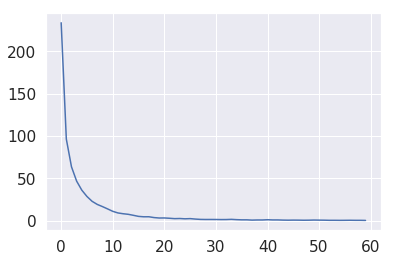

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007, 9.0736913

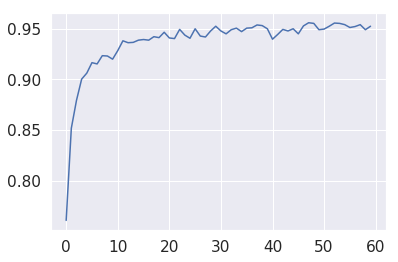

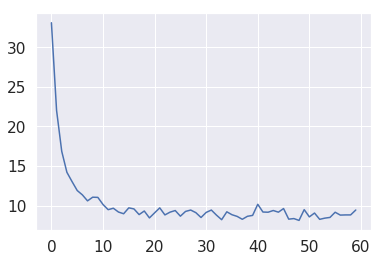


[60] accuracy: 0.953 loss: 9.433

runtime :  30279.817912817
Train
[61, 00020] loss: 0.082 acc: 0.999
[61, 00040] loss: 0.119 acc: 1.000
[61, 00060] loss: 0.156 acc: 1.000
[61, 00080] loss: 0.200 acc: 1.000
[61, 00100] loss: 0.289 acc: 1.000
[61, 00120] loss: 0.368 acc: 1.000
[61, 00140] loss: 0.415 acc: 1.000
[61, 00160] loss: 0.501 acc: 1.000
[61, 00180] loss: 0.539 acc: 0.999
[61, 00200] loss: 0.603 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125, 0

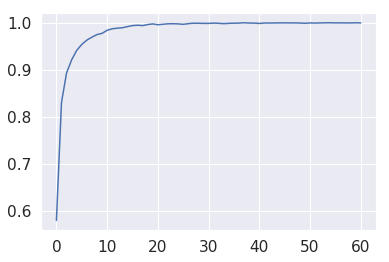

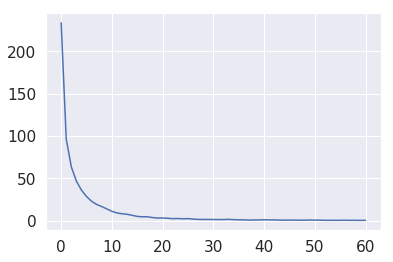

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185590595007

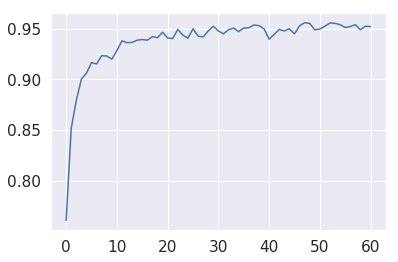

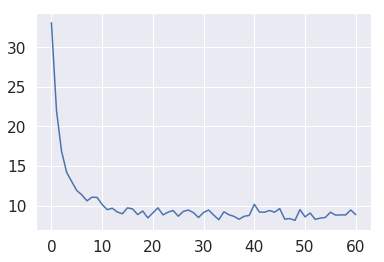


[61] accuracy: 0.952 loss: 8.842

runtime :  30804.334674358368
Train
[62, 00020] loss: 0.049 acc: 1.000
[62, 00040] loss: 0.105 acc: 1.000
[62, 00060] loss: 0.151 acc: 1.000
[62, 00080] loss: 0.206 acc: 1.000
[62, 00100] loss: 0.250 acc: 1.000
[62, 00120] loss: 0.301 acc: 1.000
[62, 00140] loss: 0.350 acc: 1.000
[62, 00160] loss: 0.388 acc: 1.000
[62, 00180] loss: 0.445 acc: 1.000
[62, 00200] loss: 0.526 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

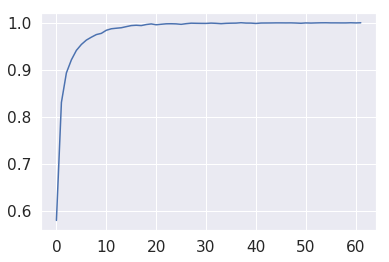

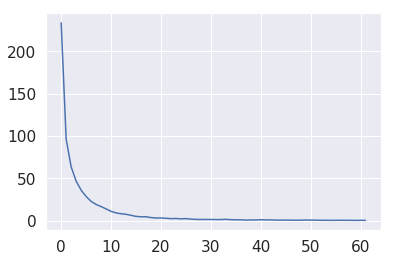

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135, 8.434185

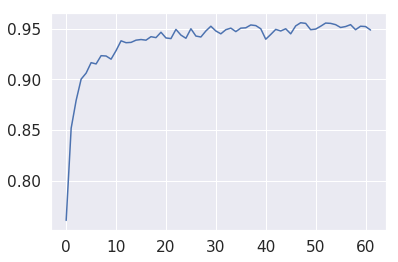

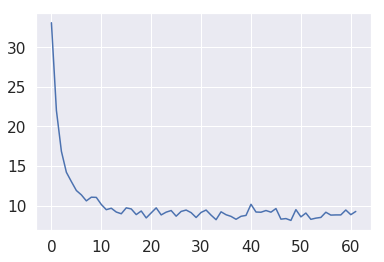


[62] accuracy: 0.949 loss: 9.250

runtime :  31329.02694964409
Train
[63, 00020] loss: 0.053 acc: 0.999
[63, 00040] loss: 0.177 acc: 0.998
[63, 00060] loss: 0.215 acc: 0.999
[63, 00080] loss: 0.265 acc: 0.999
[63, 00100] loss: 0.306 acc: 0.999
[63, 00120] loss: 0.378 acc: 0.999
[63, 00140] loss: 0.451 acc: 0.999
[63, 00160] loss: 0.504 acc: 0.999
[63, 00180] loss: 0.547 acc: 0.999
[63, 00200] loss: 0.597 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

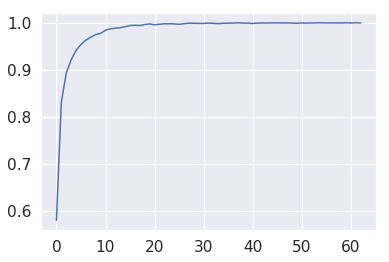

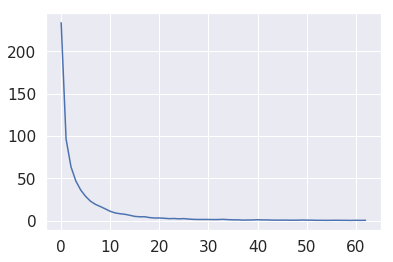

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.305812537670135,

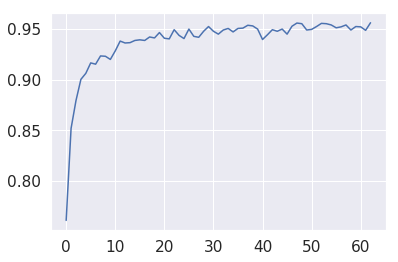

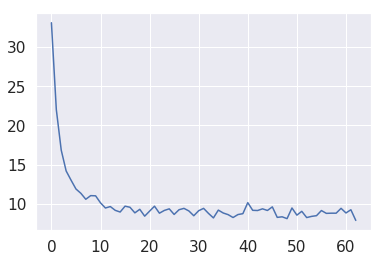


[63] accuracy: 0.956 loss: 7.891

runtime :  31858.502037525177
Train
[64, 00020] loss: 0.052 acc: 0.999
[64, 00040] loss: 0.105 acc: 0.999
[64, 00060] loss: 0.149 acc: 0.999
[64, 00080] loss: 0.213 acc: 0.999
[64, 00100] loss: 0.253 acc: 0.999
[64, 00120] loss: 0.275 acc: 0.999
[64, 00140] loss: 0.312 acc: 1.000
[64, 00160] loss: 0.539 acc: 0.999
[64, 00180] loss: 0.580 acc: 0.999
[64, 00200] loss: 0.618 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

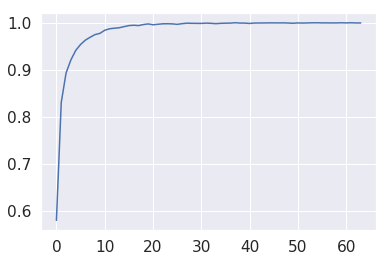

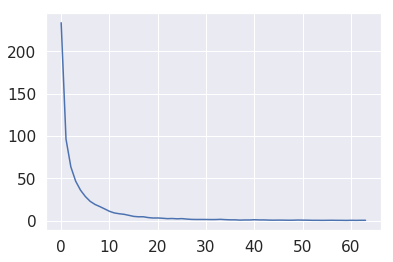

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.853633284568787, 9.30581

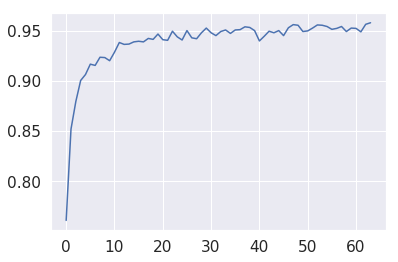

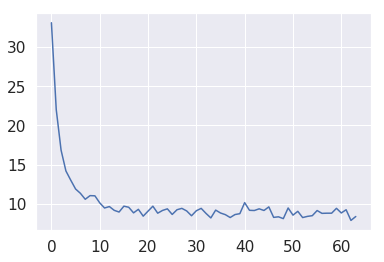


[64] accuracy: 0.958 loss: 8.391

runtime :  32385.00138616562
Train
[65, 00020] loss: 0.033 acc: 1.000
[65, 00040] loss: 0.072 acc: 1.000
[65, 00060] loss: 0.098 acc: 1.000
[65, 00080] loss: 0.185 acc: 1.000
[65, 00100] loss: 0.241 acc: 1.000
[65, 00120] loss: 0.269 acc: 1.000
[65, 00140] loss: 0.305 acc: 1.000
[65, 00160] loss: 0.353 acc: 1.000
[65, 00180] loss: 0.429 acc: 1.000
[65, 00200] loss: 0.481 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

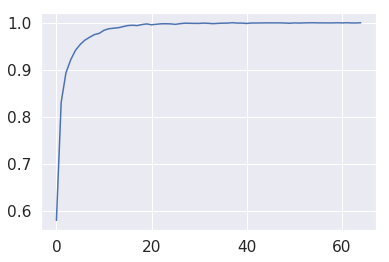

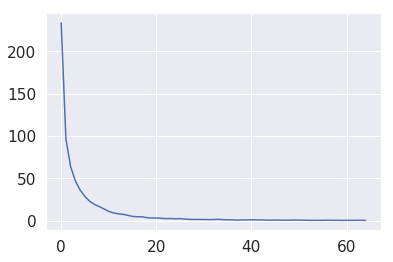

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.8536332845687

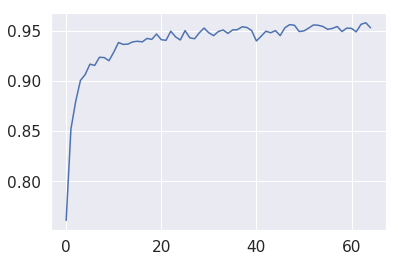

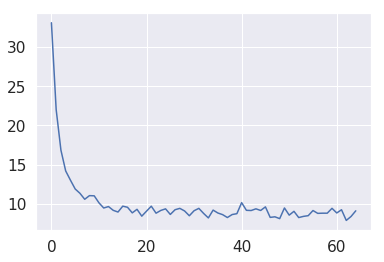


[65] accuracy: 0.953 loss: 9.116

runtime :  32912.63972711563
Train
[66, 00020] loss: 0.039 acc: 1.000
[66, 00040] loss: 0.087 acc: 1.000
[66, 00060] loss: 0.150 acc: 1.000
[66, 00080] loss: 0.190 acc: 1.000
[66, 00100] loss: 0.216 acc: 1.000
[66, 00120] loss: 0.245 acc: 1.000
[66, 00140] loss: 0.279 acc: 1.000
[66, 00160] loss: 0.363 acc: 1.000
[66, 00180] loss: 0.465 acc: 1.000
[66, 00200] loss: 0.513 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

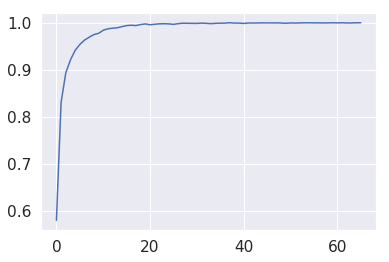

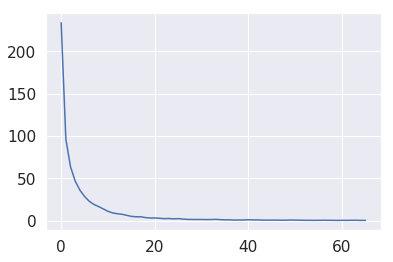

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.5681735239923, 8.85

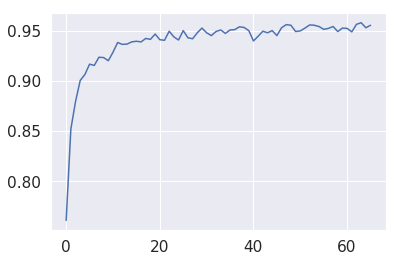

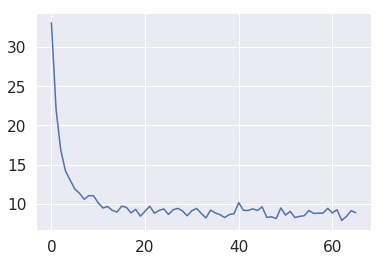


[66] accuracy: 0.955 loss: 8.888

runtime :  33440.58869314194
Train
[67, 00020] loss: 0.050 acc: 0.999
[67, 00040] loss: 0.078 acc: 1.000
[67, 00060] loss: 0.144 acc: 0.999
[67, 00080] loss: 0.176 acc: 1.000
[67, 00100] loss: 0.229 acc: 1.000
[67, 00120] loss: 0.274 acc: 1.000
[67, 00140] loss: 0.303 acc: 1.000
[67, 00160] loss: 0.331 acc: 1.000
[67, 00180] loss: 0.402 acc: 1.000
[67, 00200] loss: 0.436 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

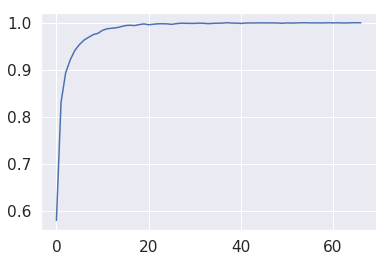

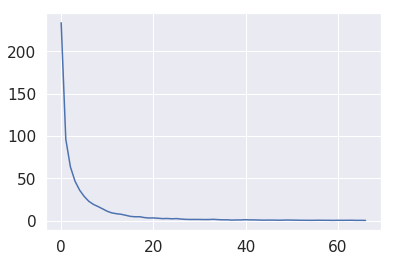

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.568173523

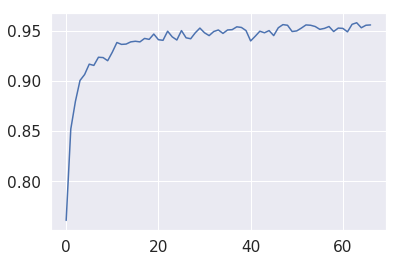

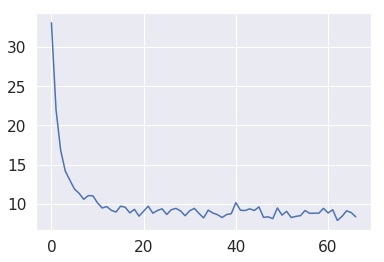


[67] accuracy: 0.956 loss: 8.356

runtime :  33968.19270825386
Train
[68, 00020] loss: 0.052 acc: 1.000
[68, 00040] loss: 0.189 acc: 0.998
[68, 00060] loss: 0.240 acc: 0.999
[68, 00080] loss: 0.303 acc: 0.999
[68, 00100] loss: 0.399 acc: 0.999
[68, 00120] loss: 0.441 acc: 0.999
[68, 00140] loss: 0.476 acc: 0.999
[68, 00160] loss: 0.518 acc: 0.999
[68, 00180] loss: 0.554 acc: 0.999
[68, 00200] loss: 0.606 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

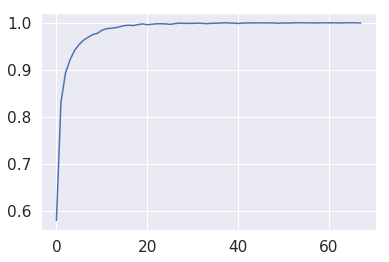

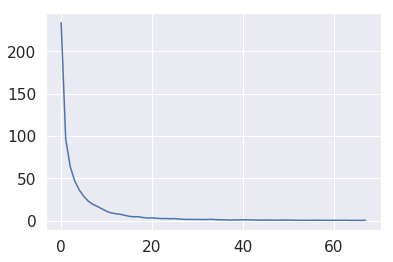

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.706056833267212, 9.

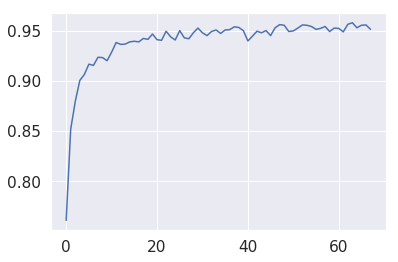

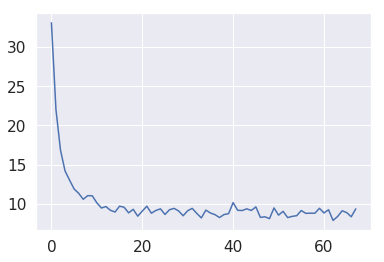


[68] accuracy: 0.951 loss: 9.365

runtime :  34497.34889435768
Train
[69, 00020] loss: 0.112 acc: 0.998
[69, 00040] loss: 0.172 acc: 0.999
[69, 00060] loss: 0.210 acc: 0.999
[69, 00080] loss: 0.290 acc: 0.999
[69, 00100] loss: 0.331 acc: 0.999
[69, 00120] loss: 0.382 acc: 0.999
[69, 00140] loss: 0.464 acc: 0.999
[69, 00160] loss: 0.538 acc: 0.999
[69, 00180] loss: 0.563 acc: 0.999
[69, 00200] loss: 0.612 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

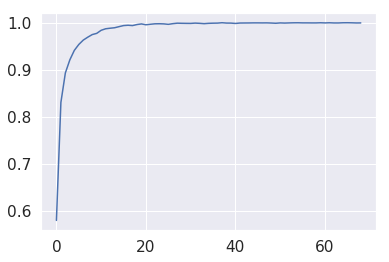

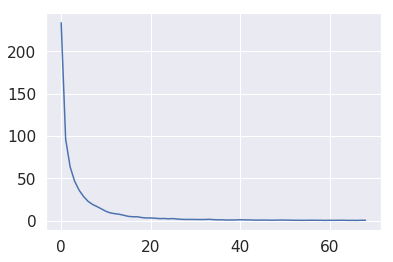

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9.7060568332

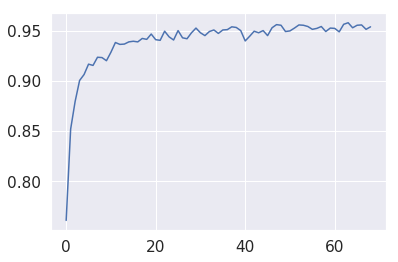

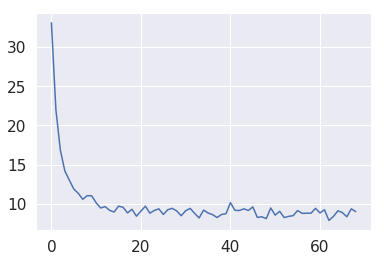


[69] accuracy: 0.954 loss: 9.006

runtime :  35028.17389392853
Train
[70, 00020] loss: 0.017 acc: 1.000
[70, 00040] loss: 0.090 acc: 1.000
[70, 00060] loss: 0.126 acc: 1.000
[70, 00080] loss: 0.160 acc: 1.000
[70, 00100] loss: 0.187 acc: 1.000
[70, 00120] loss: 0.253 acc: 1.000
[70, 00140] loss: 0.320 acc: 1.000
[70, 00160] loss: 0.357 acc: 1.000
[70, 00180] loss: 0.420 acc: 1.000
[70, 00200] loss: 0.462 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

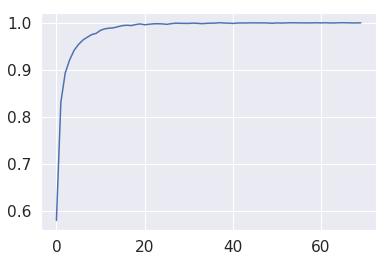

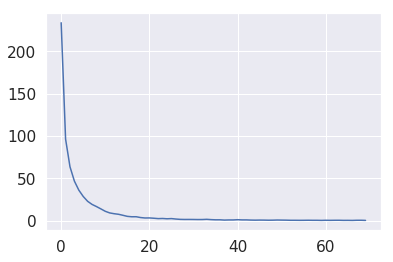

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.959865812212229, 9

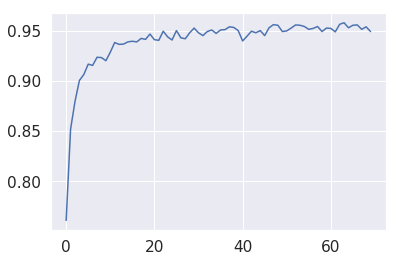

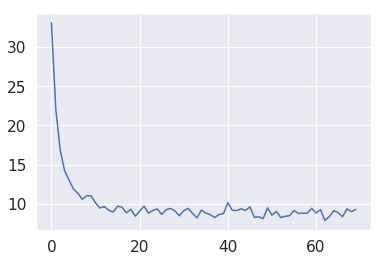


[70] accuracy: 0.949 loss: 9.291

runtime :  35555.79358410835
Train
[71, 00020] loss: 0.022 acc: 1.000
[71, 00040] loss: 0.086 acc: 1.000
[71, 00060] loss: 0.131 acc: 1.000
[71, 00080] loss: 0.169 acc: 1.000
[71, 00100] loss: 0.237 acc: 1.000
[71, 00120] loss: 0.267 acc: 1.000
[71, 00140] loss: 0.301 acc: 1.000
[71, 00160] loss: 0.328 acc: 1.000
[71, 00180] loss: 0.364 acc: 1.000
[71, 00200] loss: 0.420 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

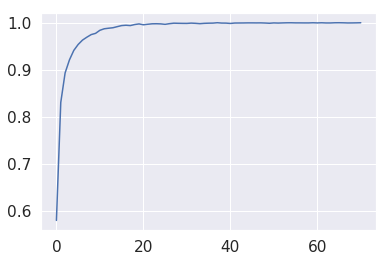

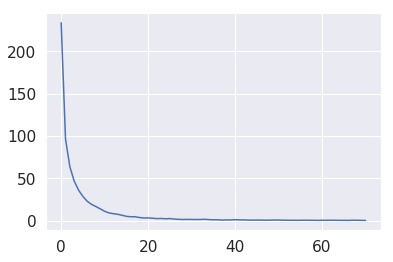

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382, 8.9598658

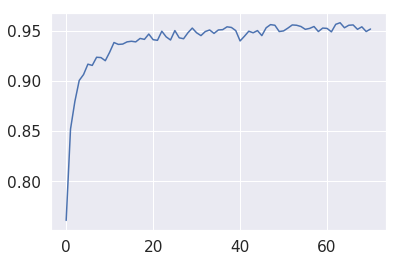

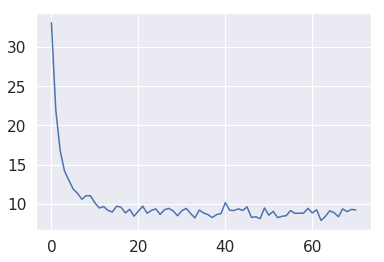


[71] accuracy: 0.952 loss: 9.227

runtime :  36085.32911324501
Train
[72, 00020] loss: 0.109 acc: 0.998
[72, 00040] loss: 0.186 acc: 0.999
[72, 00060] loss: 0.216 acc: 0.999
[72, 00080] loss: 0.249 acc: 0.999
[72, 00100] loss: 0.278 acc: 1.000
[72, 00120] loss: 0.312 acc: 1.000
[72, 00140] loss: 0.358 acc: 1.000
[72, 00160] loss: 0.406 acc: 1.000
[72, 00180] loss: 0.472 acc: 1.000
[72, 00200] loss: 0.503 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

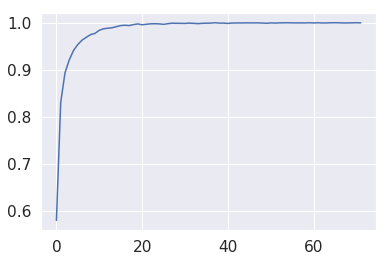

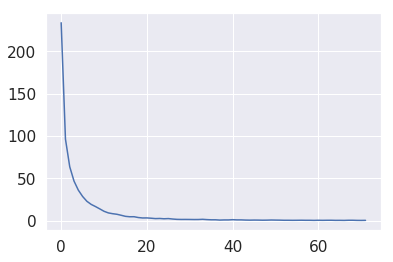

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.175428293645382

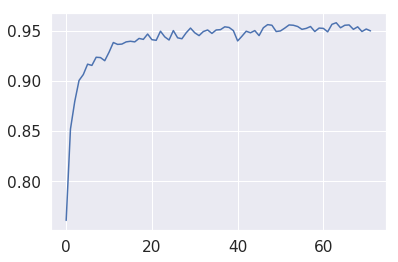

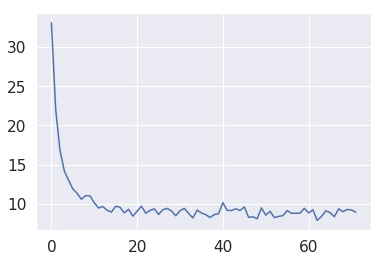


[72] accuracy: 0.950 loss: 8.936

runtime :  36614.29101037979
Train
[73, 00020] loss: 0.040 acc: 1.000
[73, 00040] loss: 0.106 acc: 1.000
[73, 00060] loss: 0.146 acc: 1.000
[73, 00080] loss: 0.183 acc: 1.000
[73, 00100] loss: 0.237 acc: 1.000
[73, 00120] loss: 0.263 acc: 1.000
[73, 00140] loss: 0.284 acc: 1.000
[73, 00160] loss: 0.337 acc: 1.000
[73, 00180] loss: 0.366 acc: 1.000
[73, 00200] loss: 0.451 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

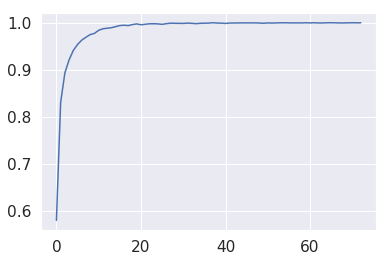

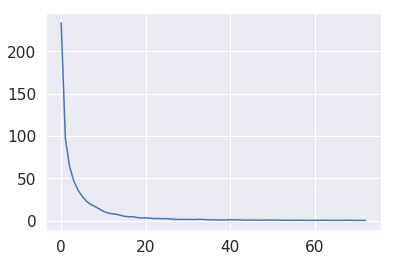

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65738133341074, 9.1754

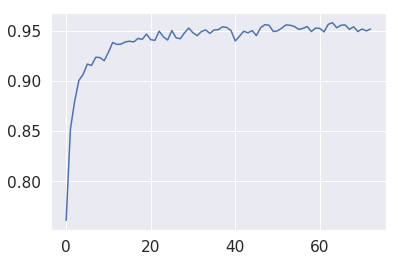

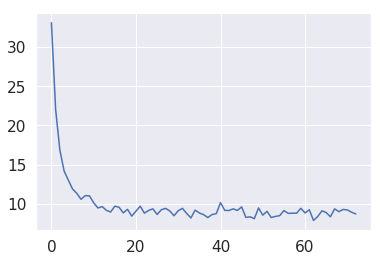


[73] accuracy: 0.952 loss: 8.713

runtime :  37147.58590102196
Train
[74, 00020] loss: 0.030 acc: 1.000
[74, 00040] loss: 0.080 acc: 1.000
[74, 00060] loss: 0.165 acc: 0.999
[74, 00080] loss: 0.196 acc: 1.000
[74, 00100] loss: 0.220 acc: 1.000
[74, 00120] loss: 0.247 acc: 1.000
[74, 00140] loss: 0.281 acc: 1.000
[74, 00160] loss: 0.327 acc: 1.000
[74, 00180] loss: 0.365 acc: 1.000
[74, 00200] loss: 0.391 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

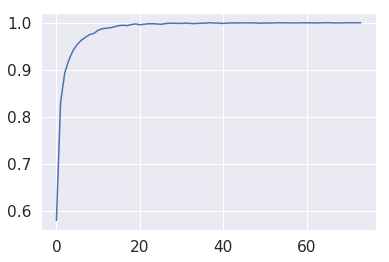

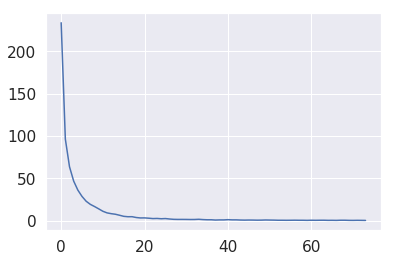

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.6573813334107

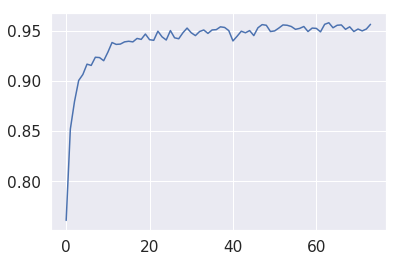

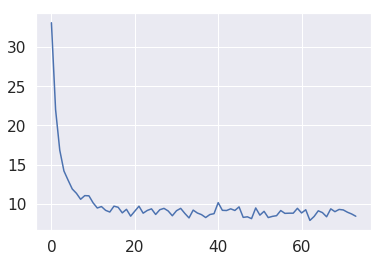


[74] accuracy: 0.956 loss: 8.424

runtime :  37671.64606380463
Train
[75, 00020] loss: 0.036 acc: 1.000
[75, 00040] loss: 0.080 acc: 1.000
[75, 00060] loss: 0.119 acc: 1.000
[75, 00080] loss: 0.182 acc: 1.000
[75, 00100] loss: 0.215 acc: 1.000
[75, 00120] loss: 0.259 acc: 1.000
[75, 00140] loss: 0.344 acc: 1.000
[75, 00160] loss: 0.398 acc: 1.000
[75, 00180] loss: 0.442 acc: 1.000
[75, 00200] loss: 0.472 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

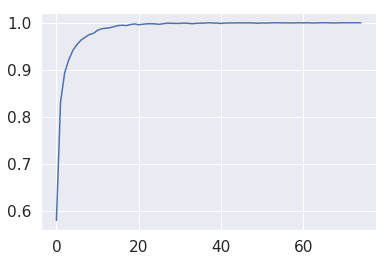

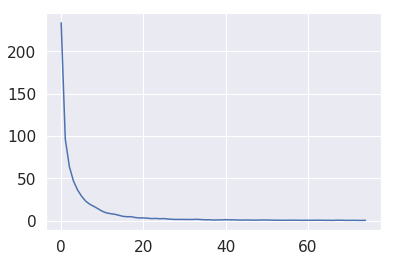

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.474014095962048, 9.65

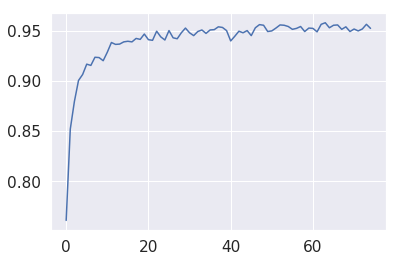

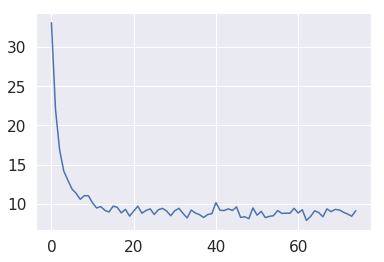


[75] accuracy: 0.952 loss: 9.137

runtime :  38194.99192452431
Train
[76, 00020] loss: 0.016 acc: 1.000
[76, 00040] loss: 0.036 acc: 1.000
[76, 00060] loss: 0.122 acc: 1.000
[76, 00080] loss: 0.158 acc: 1.000
[76, 00100] loss: 0.178 acc: 1.000
[76, 00120] loss: 0.203 acc: 1.000
[76, 00140] loss: 0.228 acc: 1.000
[76, 00160] loss: 0.258 acc: 1.000
[76, 00180] loss: 0.300 acc: 1.000
[76, 00200] loss: 0.340 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

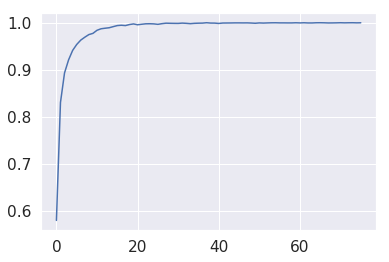

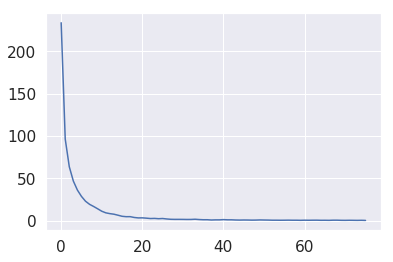

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.4740140959

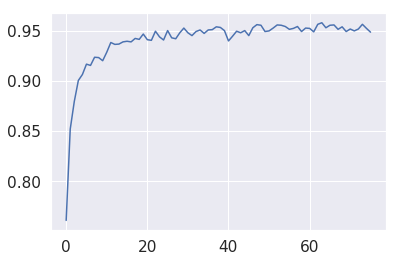

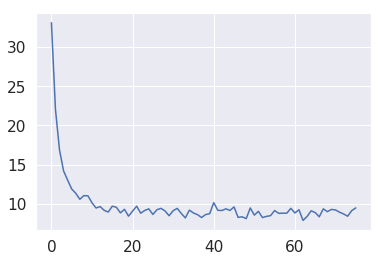


[76] accuracy: 0.948 loss: 9.488

runtime :  38719.87515830994
Train
[77, 00020] loss: 0.018 acc: 1.000
[77, 00040] loss: 0.040 acc: 1.000
[77, 00060] loss: 0.067 acc: 1.000
[77, 00080] loss: 0.104 acc: 1.000
[77, 00100] loss: 0.127 acc: 1.000
[77, 00120] loss: 0.163 acc: 1.000
[77, 00140] loss: 0.185 acc: 1.000
[77, 00160] loss: 0.225 acc: 1.000
[77, 00180] loss: 0.268 acc: 1.000
[77, 00200] loss: 0.293 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

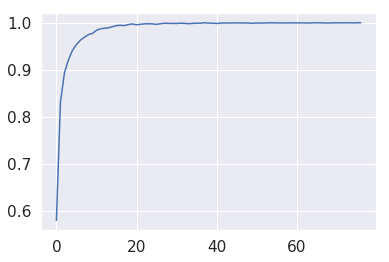

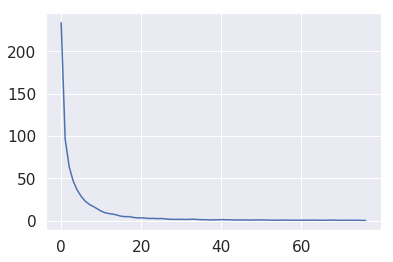

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108736, 9.4740

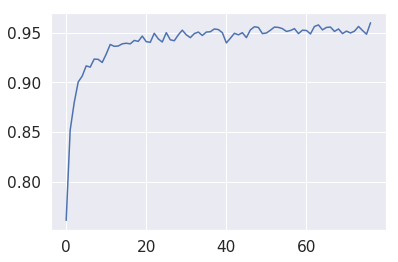

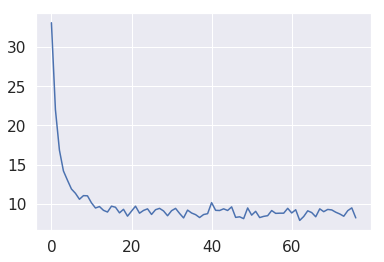


[77] accuracy: 0.960 loss: 8.211

runtime :  39245.475528001785
Train
[78, 00020] loss: 0.072 acc: 0.998
[78, 00040] loss: 0.098 acc: 0.999
[78, 00060] loss: 0.171 acc: 0.999
[78, 00080] loss: 0.200 acc: 0.999
[78, 00100] loss: 0.233 acc: 0.999
[78, 00120] loss: 0.285 acc: 0.999
[78, 00140] loss: 0.321 acc: 0.999
[78, 00160] loss: 0.350 acc: 1.000
[78, 00180] loss: 0.395 acc: 0.999
[78, 00200] loss: 0.427 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

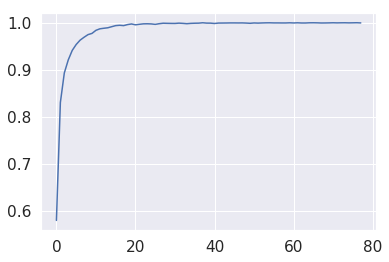

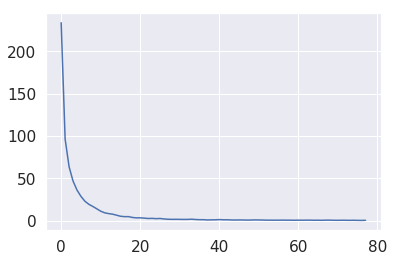

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.129071582108

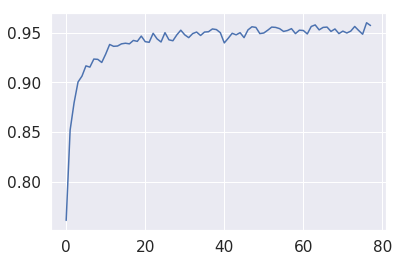

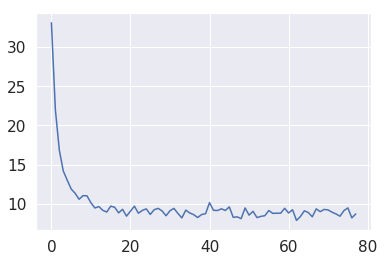


[78] accuracy: 0.957 loss: 8.719

runtime :  39768.89967942238
Train
[79, 00020] loss: 0.028 acc: 1.000
[79, 00040] loss: 0.045 acc: 1.000
[79, 00060] loss: 0.094 acc: 1.000
[79, 00080] loss: 0.232 acc: 0.999
[79, 00100] loss: 0.288 acc: 0.999
[79, 00120] loss: 0.353 acc: 0.999
[79, 00140] loss: 0.391 acc: 0.999
[79, 00160] loss: 0.432 acc: 0.999
[79, 00180] loss: 0.453 acc: 0.999
[79, 00200] loss: 0.487 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

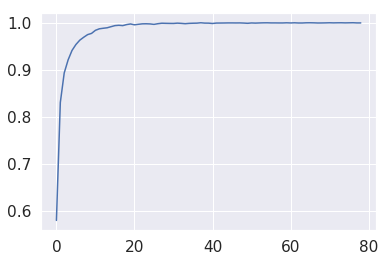

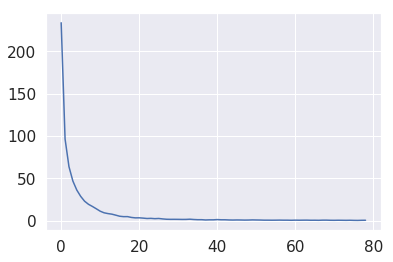

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875, 0.9540625]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.02682788670063, 10.1

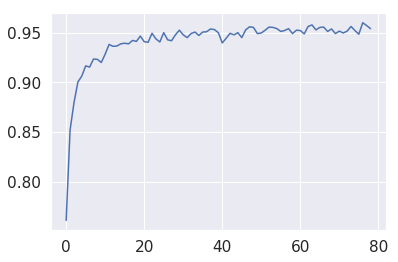

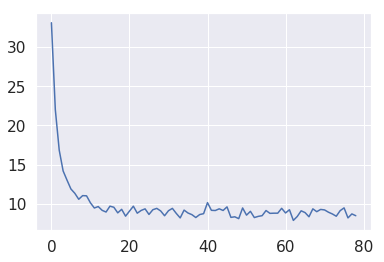


[79] accuracy: 0.954 loss: 8.488

runtime :  40294.79244804382
Train
[80, 00020] loss: 0.024 acc: 1.000
[80, 00040] loss: 0.080 acc: 1.000
[80, 00060] loss: 0.136 acc: 0.999
[80, 00080] loss: 0.167 acc: 0.999
[80, 00100] loss: 0.187 acc: 1.000
[80, 00120] loss: 0.214 acc: 1.000
[80, 00140] loss: 0.263 acc: 1.000
[80, 00160] loss: 0.328 acc: 0.999
[80, 00180] loss: 0.349 acc: 0.999
[80, 00200] loss: 0.380 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

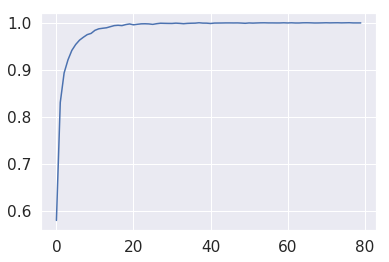

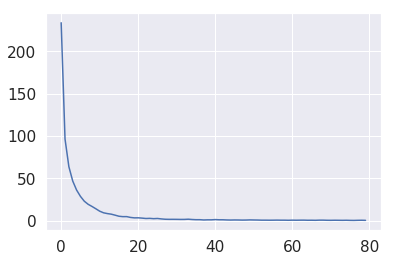

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875, 0.9540625, 0.955]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.0268278867006

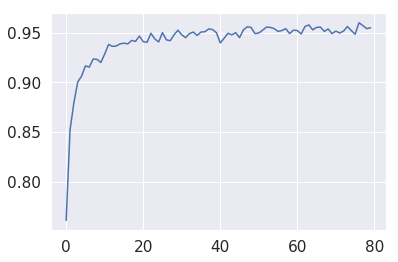

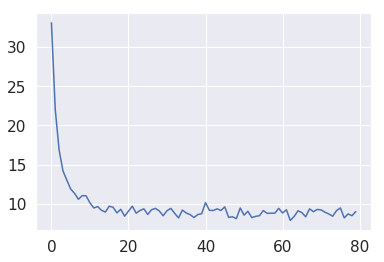


[80] accuracy: 0.955 loss: 9.018

runtime :  40818.062185287476
Train
[81, 00020] loss: 0.038 acc: 1.000
[81, 00040] loss: 0.078 acc: 1.000
[81, 00060] loss: 0.113 acc: 1.000
[81, 00080] loss: 0.142 acc: 1.000
[81, 00100] loss: 0.186 acc: 1.000
[81, 00120] loss: 0.234 acc: 1.000
[81, 00140] loss: 0.263 acc: 1.000
[81, 00160] loss: 0.290 acc: 1.000
[81, 00180] loss: 0.339 acc: 1.000
[81, 00200] loss: 0.399 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

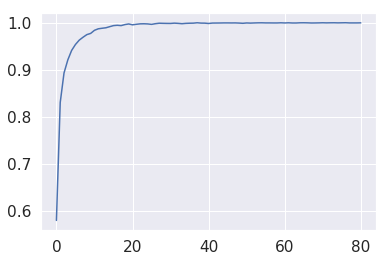

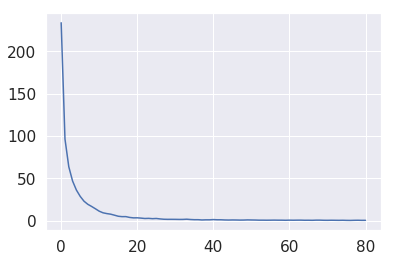

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875, 0.9540625, 0.955, 0.953125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258007, 11.026

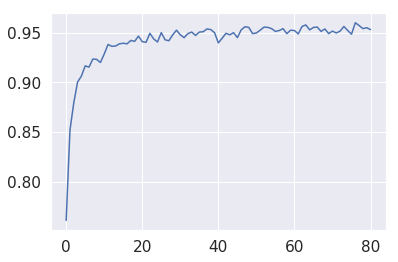

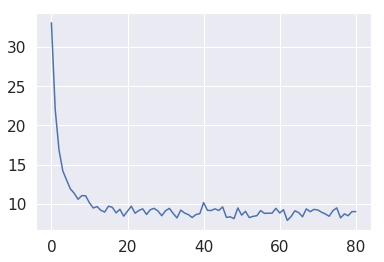


[81] accuracy: 0.953 loss: 9.013

runtime :  41347.843178510666
Train
[82, 00020] loss: 0.018 acc: 1.000
[82, 00040] loss: 0.035 acc: 1.000
[82, 00060] loss: 0.092 acc: 1.000
[82, 00080] loss: 0.116 acc: 1.000
[82, 00100] loss: 0.152 acc: 1.000
[82, 00120] loss: 0.179 acc: 1.000
[82, 00140] loss: 0.193 acc: 1.000
[82, 00160] loss: 0.218 acc: 1.000
[82, 00180] loss: 0.264 acc: 1.000
[82, 00200] loss: 0.296 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125

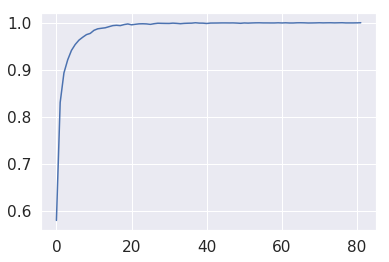

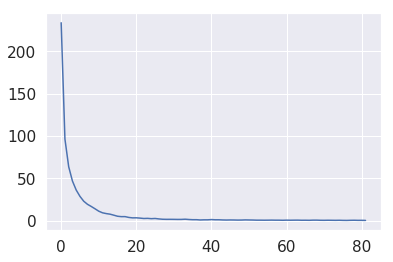

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875, 0.9540625, 0.955, 0.953125, 0.9528125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.05063085258

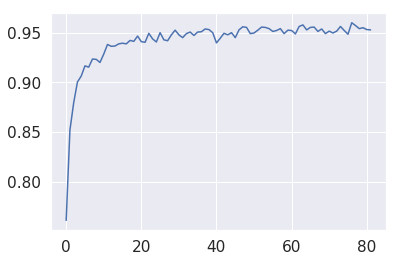

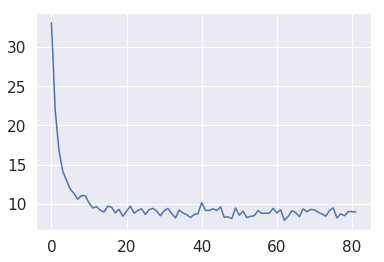


[82] accuracy: 0.953 loss: 8.959

runtime :  41873.14303445816
Train
[83, 00020] loss: 0.028 acc: 1.000
[83, 00040] loss: 0.104 acc: 0.999
[83, 00060] loss: 0.161 acc: 0.999
[83, 00080] loss: 0.216 acc: 0.999
[83, 00100] loss: 0.275 acc: 0.999
[83, 00120] loss: 0.303 acc: 0.999
[83, 00140] loss: 0.342 acc: 0.999
[83, 00160] loss: 0.360 acc: 0.999
[83, 00180] loss: 0.380 acc: 0.999
[83, 00200] loss: 0.413 acc: 0.999
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

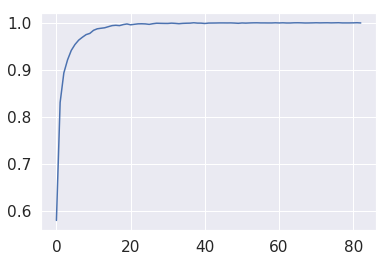

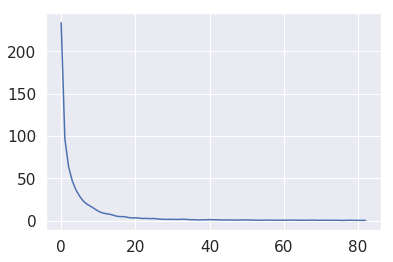

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875, 0.9540625, 0.955, 0.953125, 0.9528125, 0.9546875]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365434647, 11.

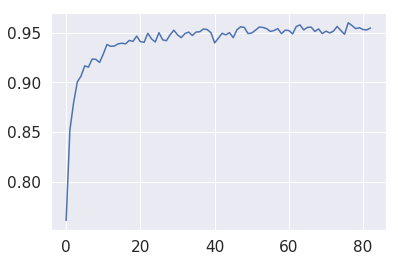

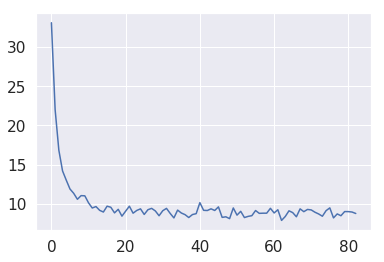


[83] accuracy: 0.955 loss: 8.773

runtime :  42397.96049642563
Train
[84, 00020] loss: 0.021 acc: 1.000
[84, 00040] loss: 0.041 acc: 1.000
[84, 00060] loss: 0.071 acc: 1.000
[84, 00080] loss: 0.089 acc: 1.000
[84, 00100] loss: 0.122 acc: 1.000
[84, 00120] loss: 0.136 acc: 1.000
[84, 00140] loss: 0.200 acc: 1.000
[84, 00160] loss: 0.239 acc: 1.000
[84, 00180] loss: 0.282 acc: 1.000
[84, 00200] loss: 0.352 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

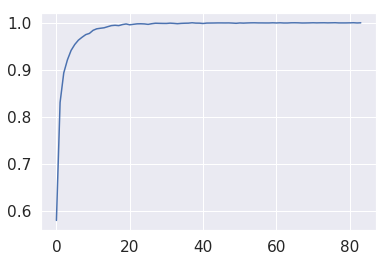

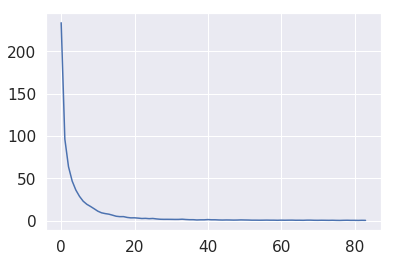

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875, 0.9540625, 0.955, 0.953125, 0.9528125, 0.9546875, 0.9503125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 10.586764365

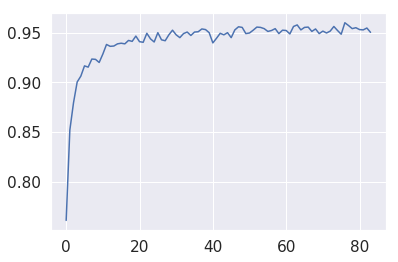

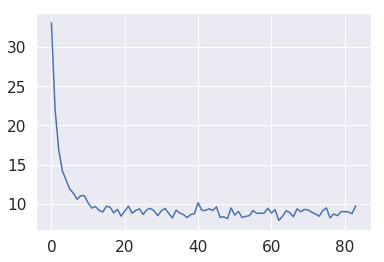


[84] accuracy: 0.950 loss: 9.757

runtime :  42924.28294825554
Train
[85, 00020] loss: 0.080 acc: 0.999
[85, 00040] loss: 0.198 acc: 0.998
[85, 00060] loss: 0.234 acc: 0.999
[85, 00080] loss: 0.288 acc: 0.999
[85, 00100] loss: 0.342 acc: 0.999
[85, 00120] loss: 0.370 acc: 0.999
[85, 00140] loss: 0.403 acc: 1.000
[85, 00160] loss: 0.439 acc: 1.000
[85, 00180] loss: 0.490 acc: 1.000
[85, 00200] loss: 0.506 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

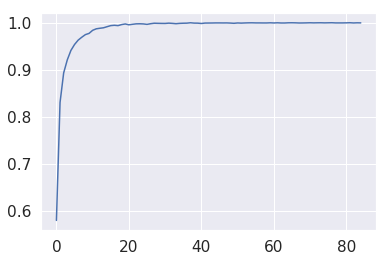

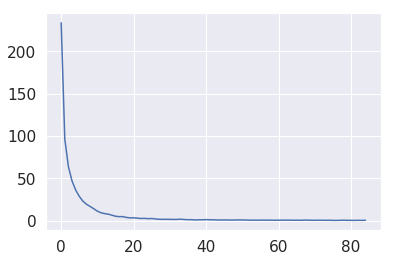

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875, 0.9540625, 0.955, 0.953125, 0.9528125, 0.9546875, 0.9503125, 0.9534375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.345171250402927, 1

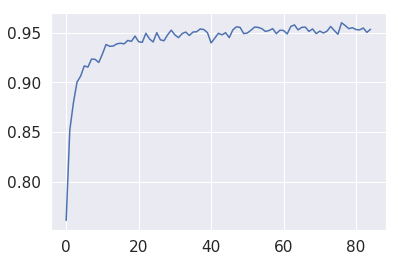

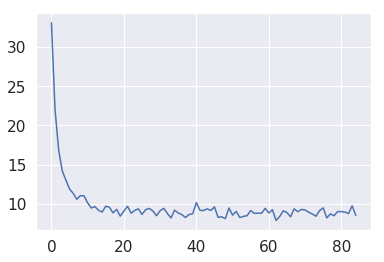


[85] accuracy: 0.953 loss: 8.529

runtime :  43450.07744932175
Train
[86, 00020] loss: 0.040 acc: 0.999
[86, 00040] loss: 0.067 acc: 1.000
[86, 00060] loss: 0.084 acc: 1.000
[86, 00080] loss: 0.108 acc: 1.000
[86, 00100] loss: 0.132 acc: 1.000
[86, 00120] loss: 0.170 acc: 1.000
[86, 00140] loss: 0.193 acc: 1.000
[86, 00160] loss: 0.220 acc: 1.000
[86, 00180] loss: 0.254 acc: 1.000
[86, 00200] loss: 0.278 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

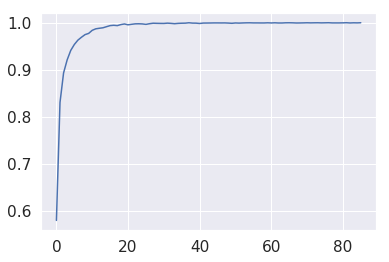

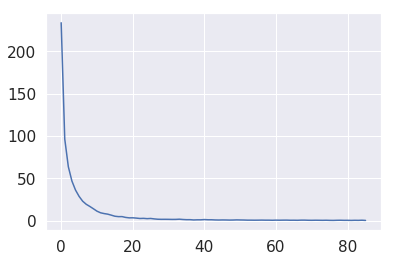

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875, 0.9540625, 0.955, 0.953125, 0.9528125, 0.9546875, 0.9503125, 0.9534375, 0.9553125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 11.3451712

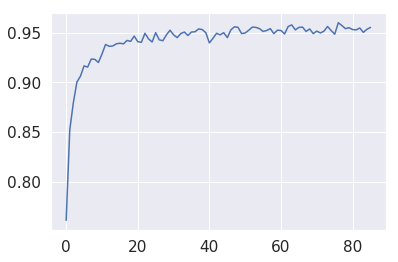

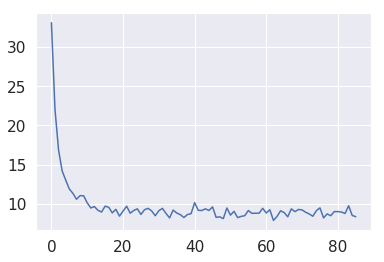


[86] accuracy: 0.955 loss: 8.360

runtime :  43977.12489390373
Train
[87, 00020] loss: 0.070 acc: 0.999
[87, 00040] loss: 0.099 acc: 1.000
[87, 00060] loss: 0.119 acc: 1.000
[87, 00080] loss: 0.222 acc: 0.999
[87, 00100] loss: 0.260 acc: 0.999
[87, 00120] loss: 0.285 acc: 0.999
[87, 00140] loss: 0.328 acc: 0.999
[87, 00160] loss: 0.361 acc: 0.999
[87, 00180] loss: 0.400 acc: 0.999
[87, 00200] loss: 0.416 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

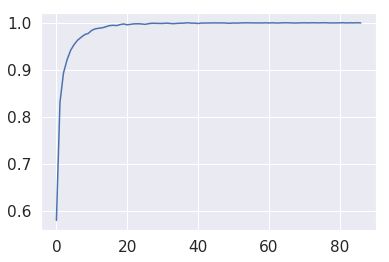

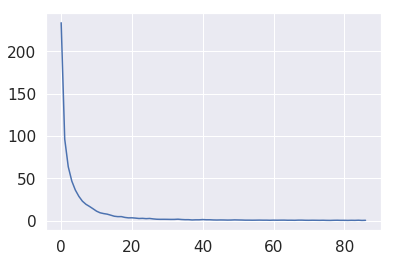

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875, 0.9540625, 0.955, 0.953125, 0.9528125, 0.9546875, 0.9503125, 0.9534375, 0.9553125, 0.95375]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936203957, 1

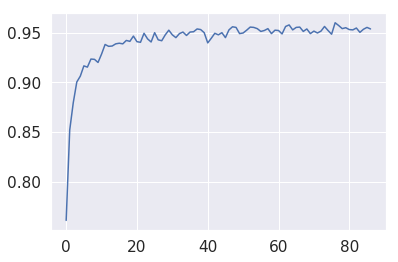

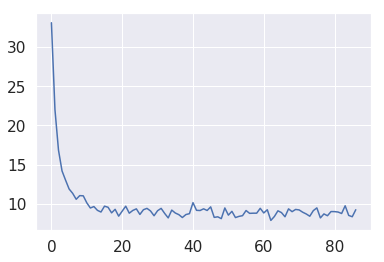


[87] accuracy: 0.954 loss: 9.254

runtime :  44503.51392579079
Train
[88, 00020] loss: 0.051 acc: 0.999
[88, 00040] loss: 0.090 acc: 1.000
[88, 00060] loss: 0.146 acc: 0.999
[88, 00080] loss: 0.165 acc: 1.000
[88, 00100] loss: 0.187 acc: 1.000
[88, 00120] loss: 0.222 acc: 1.000
[88, 00140] loss: 0.241 acc: 1.000
[88, 00160] loss: 0.276 acc: 1.000
[88, 00180] loss: 0.301 acc: 1.000
[88, 00200] loss: 0.338 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

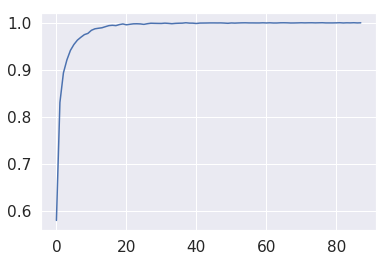

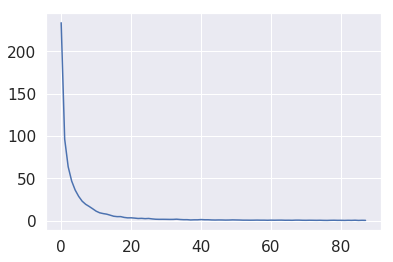

Validation
[0.7609375, 0.851875, 0.879375, 0.9003125, 0.90625, 0.9165625, 0.9153125, 0.9234375, 0.923125, 0.92, 0.9284375, 0.938125, 0.93625, 0.9365625, 0.93875, 0.939375, 0.93875, 0.9421875, 0.94125, 0.9465625, 0.9409375, 0.9403125, 0.949375, 0.94375, 0.940625, 0.95, 0.9428125, 0.941875, 0.9478125, 0.9525, 0.9478125, 0.945, 0.9490625, 0.950625, 0.9471875, 0.950625, 0.9509375, 0.95375, 0.953125, 0.95, 0.9396875, 0.944375, 0.949375, 0.9478125, 0.95, 0.945, 0.9528125, 0.9559375, 0.9553125, 0.9490625, 0.9496875, 0.9525, 0.955625, 0.9553125, 0.9540625, 0.95125, 0.9521875, 0.9540625, 0.9490625, 0.9525, 0.9521875, 0.94875, 0.95625, 0.9578125, 0.9528125, 0.9553125, 0.955625, 0.95125, 0.95375, 0.9490625, 0.9515625, 0.9496875, 0.9515625, 0.95625, 0.9521875, 0.9484375, 0.96, 0.9571875, 0.9540625, 0.955, 0.953125, 0.9528125, 0.9546875, 0.9503125, 0.9534375, 0.9553125, 0.95375, 0.95125]
[33.089440047740936, 22.01114049553871, 16.846210956573486, 14.196536108851433, 13.021023720502853, 11.895394936

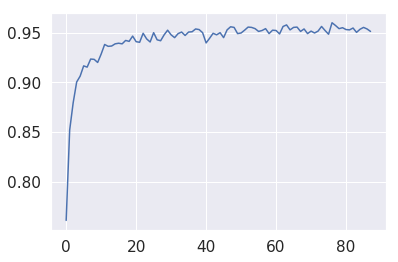

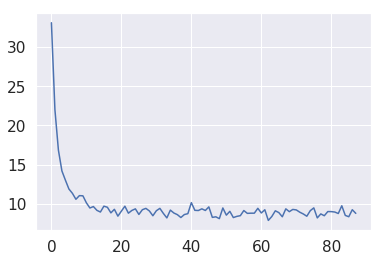


[88] accuracy: 0.951 loss: 8.789

runtime :  45029.96158981323
Train
[89, 00020] loss: 0.040 acc: 1.000
[89, 00040] loss: 0.094 acc: 1.000
[89, 00060] loss: 0.120 acc: 1.000
[89, 00080] loss: 0.170 acc: 1.000
[89, 00100] loss: 0.207 acc: 1.000
[89, 00120] loss: 0.275 acc: 0.999
[89, 00140] loss: 0.323 acc: 0.999
[89, 00160] loss: 0.359 acc: 1.000
[89, 00180] loss: 0.404 acc: 0.999
[89, 00200] loss: 0.441 acc: 1.000
[0.579765625, 0.83046875, 0.89328125, 0.921015625, 0.94109375, 0.953671875, 0.96296875, 0.969140625, 0.9746875, 0.977265625, 0.983828125, 0.98703125, 0.988203125, 0.98921875, 0.9915625, 0.993828125, 0.99453125, 0.993828125, 0.996015625, 0.99734375, 0.995546875, 0.996640625, 0.997578125, 0.997734375, 0.997421875, 0.996484375, 0.997890625, 0.99890625, 0.998671875, 0.998515625, 0.9984375, 0.9990625, 0.99859375, 0.997890625, 0.99859375, 0.99890625, 0.9990625, 0.99984375, 0.999140625, 0.9990625, 0.998359375, 0.99921875, 0.999296875, 0.999375, 0.99953125, 0.99953125, 0.999453125,

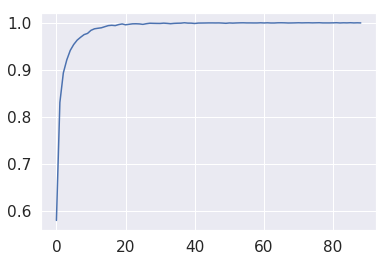

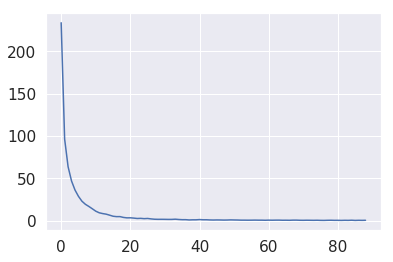

Validation


In [ ]:
train_acc = []
train_loss = []
val_acc = []
val_loss = []
import time
start_time = time.time()
for epoch in range(EPOCH):
    print("Train")
    total = 0
    correct = 0
    running_loss = 0.0
    for step, (labels, images,_) in enumerate(trainloader):
        optimizer.zero_grad()
#         print("in Train: ", images.shape, labels.shape)
#         images = images.detach()
#         labels = labels.detach()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
        outputs = model(images)
        
        # loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        acc = correct / total

        if step % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %05d] loss: %.3f acc: %.3f' %
                  (epoch + 1, step + 1, running_loss, acc))

    train_acc.append(acc)
    train_loss.append(running_loss)
    print(train_acc)
    print(train_loss)
    plt.figure()
    plt.plot(range(0,epoch+1), train_acc)
    plt.savefig(model_directory + "train_acc_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,epoch+1), train_loss)
    plt.savefig(model_directory + "train_loss_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    
    # Evaluate validation set
    print("Validation")
    total = 0
    correct = 0
    running_loss = 0.0
    for step, (labels, images,_) in enumerate(valloader):
        optimizer.zero_grad()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
#         images = images.detach()
#         labels = labels.detach()
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        acc = correct / total
    
    val_acc.append(acc)
    val_loss.append(running_loss)
    print(val_acc)
    print(val_loss)
    plt.figure()
    plt.plot(range(0,epoch+1), val_acc)
    plt.savefig(model_directory + "val_acc_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,epoch+1), val_loss)
    plt.savefig(model_directory + "val_loss_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    
    print('\n[%d] accuracy: %.3f loss: %.3f\n' % (epoch + 1, acc, running_loss))
    running_loss = 0.0
    # Saving model
    model_path = PJ(model_directory, "%03d_weights.pt" % (epoch+1))
    torch.save(model.state_dict(), model_path)
    runtime = time.time() - start_time
    print("runtime : ", runtime)

In [ ]:
print("runtime : ", runtime)
resultfile = open(model_directory+"train_results.txt", "a")
resultfile.write("train")
resultfile.write(str(train_acc))
resultfile.write("\n")
resultfile.write(str(train_loss))
resultfile.write("\n")
resultfile.write("validation")
resultfile.write("\n")
resultfile.write(str(val_acc))
resultfile.write("\n")
resultfile.write(str(val_loss))
resultfile.write("\n")
resultfile.close()

# TEST
### evaluate
### test every model
### saliency map

In [ ]:
transform = transform_set(train=False)
testset = TermiteDataset(TestFile, transform)
testloader = Data.DataLoader(
    dataset=testset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
test_acc = []
test_loss = []
import time
start = time.time()
# classes2 = ["O. formosanus Worker","C. formosanus Worker", "C. domesticus Worker", "R. flaviceps Worker"]
for model_num in range(1, EPOCH+1):
    wrong_images = []
    wrong_answer = []
    actual_answer = []
    weight_path = model_directory + "%03d_weights.pt" % (model_num)
    state_dict = torch.load(weight_path)
    model.load_state_dict(state_dict)
    running_loss = 0.0
    total = 0
    correct = 0
    confusion_matrix = torch.zeros(len(classes), len(classes))
    for step, (labels, images, paths) in enumerate(testloader):
        optimizer.zero_grad()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        # append to the wrong list (test log file)
        for i in range(len(predicted)):
            if predicted[i] != labels[i]:
#                 print(paths[i], predicted[i], labels[i])
                wrong_images.append(paths[i])
                wrong_answer.append(predicted[i].item())
                actual_answer.append(labels[i].item())
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for t, p in zip(labels.view(-1), predicted.view(-1)):
#             print(t.item(), p.item())
#             mapp = { 1: 0,
#                     3: 1,
#                     5: 2,
#                     6: 3}
#             confusion_matrix[mapp[t.item()], mapp[p.item()]] += 1
            confusion_matrix[t.item(), p.item()] += 1
    
    running_acc = correct / total
    print('\n[%d] accuracy: %.3f loss: %.3f\n' % (model_num, running_acc, running_loss))
    
    test_acc.append(running_acc)
    test_loss.append(running_loss)
    print(test_acc)
    print(test_loss)
    plt.figure()
    plt.plot(range(0,model_num), test_acc)
    plt.savefig(temp_directory + "test_acc_E%03d.jpg" % (model_num), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,model_num), test_loss)
    plt.savefig(temp_directory + "test_loss_E%03d.jpg" % (model_num), dpi=500)
    plt.show()
    
    
    print(wrong_answer)
    with open(temp_directory + "%03d_wrong.txt" % (model_num), 'w') as wrong:
#         c = zip(wrong_images, wrong_answer, actual_answer)
#         c = sorted(c)
#         (wrong_images, wrong_answer, actual_answer) = zip(*c)
#         print(wrong_images)
        for i in range(len(wrong_images)):
            wrong.write(wrong_images[i] + " " + classes[wrong_answer[i]] + " " + classes[actual_answer[i]])
#             print(wrong_images[i] + " " + classes[wrong_answer[i]] + " " + classes[actual_answer[i]])
            wrong.write("\n")
        wrong.close()
#     print(confusion_matrix)
    confusion_matrix = confusion_matrix.numpy().astype(int)
#     print(confusion_matrix)
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in classes],
                  columns = [i for i in classes])
    print(df_cm)
    sn.set(font_scale=1.4)#for label size
#     print(classes)
    img = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="d")
    figure = img.get_figure()
    plt.tight_layout()
    plt.savefig(temp_directory + "confusion_matrix_%03d.jpg" % (model_num), dpi=500)
    plt.show()
    runtime = time.time() - start
    print("runtime : ", runtime)

In [ ]:
print("runtime : ", runtime)
resultfile = open(model_directory+"test_results.txt", "a")
resultfile.write("test")
resultfile.write("\n")
resultfile.write(str(test_acc))
resultfile.write("\n")
resultfile.write(str(test_loss))
resultfile.write("\n")
resultfile.close()
